<center>
    <img src="https://scontent.fsgn5-11.fna.fbcdn.net/v/t39.30808-6/404266109_3572051169747503_1333821210652151216_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=3635dc&_nc_ohc=XrEzbtz2Eq0AX-QkxhY&_nc_ht=scontent.fsgn5-11.fna&oh=00_AfBRA1OYUy_KVuuawTXHEs8t3IBv95giNj7yujwN1PX1sg&oe=6578ADB2" alt="image.png">
</center>

## About the Dataset
   Đây là một tập dữ liệu mô phỏng các giao dịch thẻ tín dụng, bao gồm cả các giao dịch hợp lệ và gian lận trong khoảng thời gian từ ngày 1 tháng 1 năm 2019 đến ngày 31 tháng 6 năm 2020. Tập dữ liệu này bao gồm thông tin về giao dịch của 1000 khách hàng sử dụng thẻ tín dụng với một nhóm 800 nhà cung cấp dịch vụ.
## Data Description

* trans_date_trans_time: Ngày và giờ của giao dịch.
* cc_num: Số thẻ tín dụng của khách hàng.
* merchant: Nhà cung cấp dịch vụ mà khách hàng đang thanh toán (ví dụ: Amazon, Walmart).
* category: Danh mục của giao dịch.
* amt: Số tiền của giao dịch.
* first: Tên đầu tiên của khách hàng.
* last: Họ của khách hàng.
* gender: Giới tính của khách hàng.
* street, city, state: Địa chỉ của khách hàng.
* zip: Mã zip của giao dịch.
* lat: Vĩ độ của khách hàng.
* long: Kinh độ của khách hàng.
* city_pop: Dân số của thành phố mà khách hàng đang sống.
* job: Nghề nghiệp của khách hàng.
* dob: Ngày sinh của khách hàng.
* trans_num: Số giao dịch duy nhất cho mỗi giao dịch.
* unix_time: Thời gian của giao dịch theo định dạng Unix (thường không được sử dụng trong phân tích do tính duy nhất).
* merch_lat: Vĩ độ của người bán.
* merch_long: Kinh độ của người bán.
* is_fraud: Chỉ số nhị phân cho biết liệu giao dịch có gian lận hay không (1 nếu gian lận, 0 nếu không gian lận).

# Import Libraries

In [20]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
from IPython.display import Image

# Import các modules và classes từ scikit-learn
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings; warnings.filterwarnings("ignore")


## Import Data

In [21]:
# Đọc dữ liệu từ các file CSV
fraud_train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
fraud_test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# Gán fraud_train cho df, sau đó loại bỏ cột đầu tiên của fraud_test và df
df = fraud_train
fraud_test.drop(fraud_test.columns[:1], axis=1, inplace=True)
df.drop(df.columns[:1], axis=1, inplace=True)

# Hiển thị các hàng đầu tiên của DataFrame df
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [22]:
# In ra số lượng bản ghi trong tập dữ liệu kiểm tra và tập dữ liệu chính
print('Number of records in the test dataset: ', fraud_test.shape)
print('Number of records in the dataset: ', df.shape)

Number of records in the test dataset:  (555719, 22)
Number of records in the dataset:  (1296675, 22)


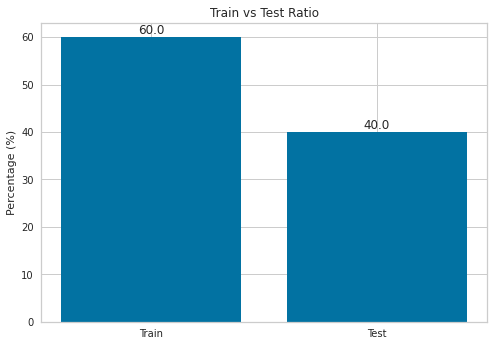

In [23]:
# Tính tỷ lệ phần trăm giữa tập huấn luyện và tập kiểm tra
train_percentage = 100 - 100 * round(len(fraud_test) / len(fraud_train), 1)
test_percentage = 100 * round(len(fraud_test) / len(fraud_train), 1)

# Vẽ biểu đồ cột hiển thị tỷ lệ tập huấn luyện và tập kiểm tra
plt.bar(['Train', 'Test'], [train_percentage, test_percentage])
plt.ylabel('Percentage (%)')
plt.title('Train vs Test Ratio')

# Hiển thị giá trị trên cột của biểu đồ
for i, v in enumerate([train_percentage, test_percentage]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [25]:
# Đếm giá trị duy nhất
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

Genuine: 1289169 and 99.42 % of the dataset
Frauds: 7506 and 0.58 % of the dataset


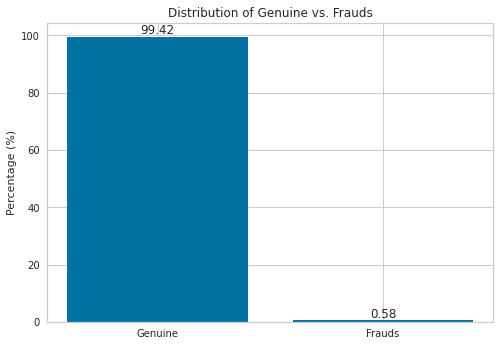

In [26]:
# Tính phần trăm số lượng giao dịch không gian lận và giao dịch gian lận trong tập dữ liệu
genuine_percentage = round((df['is_fraud'].value_counts()[0] / len(df)) * 100, 2)
fraud_percentage = round((df['is_fraud'].value_counts()[1] / len(df)) * 100, 2)

# In ra số lượng giao dịch không gian lận và giao dịch gian lận cùng với phần trăm tương ứng
print('Genuine:', df['is_fraud'].value_counts()[0], 'and', genuine_percentage, '% of the dataset')
print('Frauds:', df['is_fraud'].value_counts()[1], 'and', fraud_percentage, '% of the dataset')

# Vẽ biểu đồ cột để thể hiện phân phối giữa giao dịch không gian lận và giao dịch gian lận
plt.bar(['Genuine', 'Frauds'], [genuine_percentage, fraud_percentage])
plt.ylabel('Percentage (%)')
plt.title('Distribution of Genuine vs. Frauds')

# Hiển thị giá trị trên cột của biểu đồ
for i, v in enumerate([genuine_percentage, fraud_percentage]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Data pre-processing

In [27]:
# Tạo một bản sao của DataFrame để loại bỏ các dòng trùng lặp
df_dropdup = df.copy()

# Loại bỏ các dòng trùng lặp từ DataFrame
df_dropdup.drop_duplicates(inplace=True)

# In ra thông báo về việc loại bỏ các giá trị trùng lặp và số lượng giá trị bị loại bỏ
print("Number of duplicated values removed:", df.shape[0] - df_dropdup.shape[0])

# Gán DataFrame ban đầu bằng DataFrame không có dòng trùng lặp
df = df_dropdup


Number of duplicated values removed: 0


In [28]:
# Chuyển đổi cột 'trans_date_trans_time' thành định dạng datetime trong DataFrame 'df'
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [29]:
# Chuyển đổi cột 'dob' thành định dạng datetime trong DataFrame 'df'
df['dob'] = pd.to_datetime(df['dob'])


In [30]:
# Loại bỏ chuỗi 'fraud_' từ cột 'merchant' trong DataFrame 'df'
df['merchant'] = df['merchant'].str.strip('fraud_')


In [31]:
df.head(3)

trans_date_trans_time            cc_num                   merchant  \
0   2019-01-01 00:00:18  2703186189652095       Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322  Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661             Lind-Buckridge   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   

   city_pop                                job        dob  \
0      3495          Psychologist, counselling 1988-03-09   
1       149  Special educational needs teacher 1978-06-21   
2      4154        Nature conservation officer 1962-01-19   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   

   is_fraud  
0         0  
1         0  
2         0  

[3 rows x 22 columns]

# Feature Extraction

In [32]:
# Tạo cột 'year_month' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Hiển thị cột 'year_month' trong DataFrame 'df'
df['year_month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1296670    2020-06
1296671    2020-06
1296672    2020-06
1296673    2020-06
1296674    2020-06
Name: year_month, Length: 1296675, dtype: period[M]

In [33]:
# Tạo cột 'day_of_week' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# Hiển thị cột 'day_of_week' trong DataFrame 'df'
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_of_week, Length: 1296675, dtype: object

In [34]:
df_mapping = df.copy()

In [35]:
# Tạo cột 'trans_hour' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Hiển thị cột 'trans_hour' trong DataFrame 'df'
df['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int64

In [36]:
# Chuyển cột 'dob' sang định dạng datetime và tính tuổi trong DataFrame 'df'
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = ((df['trans_date_trans_time'] - df['dob'])/ pd.Timedelta(days=365)).astype(int)


In [37]:
df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                              merchant       category     amt        first  \
0                 Rippin, Kub and Mann       misc_net    4.97     Jennifer   
1            Heller, Gutmann and Zieme    grocery_pos  107.23    Stephanie   
2                       Lind-Buckridge  entertainment  220.11       Edward   
3         Kutch, Hermiston and Farrell  gas_transport   45.00       Jeremy   
4                        Keeling-Crist       misc_pos   41.96        Tyler   
...                                ...            ...     ...          ...   
1296670                    Reichel Inc  entertainment   15.56         Erik   
1296671             Abernathy and Sons    food_dining   51.70      Jeffrey   
1296672                  Stiedemann Lt    food_dining  105.93  Christopher   
1296673  Reinger, Weissnat and Strosin    food_dining   74.90       Joseph   
1296674  Langosh, Wintheiser and Hyatt    food_dining    4.30      Jeffrey   

              last gender                         street  \
0            Banks      F                 561 Perry Cove   
1             Gill      F   43039 Riley Greens Suite 393   
2          Sanchez      M       594 White Dale Suite 530   
3            White      M    9443 Cynthia Court Apt. 038   
4           Garcia      M               408 Bradley Rest   
...            ...    ...                            ...   
1296670  Patterson      M       162 Jessica Row Apt. 072   
1296671      White      M  8617 Holmes Terrace Suite 651   
1296672  Castaneda      M     1632 Cohen Drive Suite 639   
1296673     Murray      M           42933 Ryan Underpass   
1296674      Smith      M           135 Joseph Mountains   

                             city  ...        dob  \
0                  Moravian Falls  ... 1988-03-09   
1                          Orient  ... 1978-06-21   
2                      Malad City  ... 1962-01-19   
3                         Boulder  ... 1967-01-12   
4                        Doe Hill  ... 1986-03-28   
...                           ...  ...        ...   
1296670                     Hatch  ... 1961-11-24   
1296671                 Tuscarora  ... 1979-12-11   
1296672  High Rolls Mountain Park  ... 1967-08-30   
1296673                 Manderson  ... 1980-08-18   
1296674                      Sula  ... 1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266 -111.690765   
1296671  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881  -78.246528   
1296672  483f52fe67fabef353d552c1e662974c  1371816752  33.619513 -105.130529   
1296673  d667cdcbadaaed3da3f4020e83591c83  1371816816  42.788940 -103.241160   
1296674  8f7c8e4ab7f25875d753b422917c98c9  1371816817  46.565983 -114.186110   

        is_fraud year_month day_of_week  trans_hour  age  
0              0    2019-01     Tuesday     

In [38]:
from geopy.distance import geodesic
# Tính toán khoảng cách và lưu vào cột 'distance'
df['distance'] = df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)

In [39]:
#  Danh sách các cột sẽ được loại bỏ khỏi DataFrame

drop_cols = ['trans_date_trans_time','cc_num','unix_time','lat',
              'long','merch_lat','merch_long','dob','city','street','merchant',
             'zip','first','last','trans_num','job']

In [40]:
# Loại bỏ các cột trong danh sách 'drop_cols' từ DataFrame 'df'
df.drop(drop_cols, axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)  # Reset chỉ số của DataFrame


In [41]:
df.head(3)

category     amt gender state  city_pop  is_fraud year_month  \
0       misc_net    4.97      F    NC      3495         0    2019-01   
1    grocery_pos  107.23      F    WA       149         0    2019-01   
2  entertainment  220.11      M    ID      4154         0    2019-01   

  day_of_week  trans_hour  age    distance  
0     Tuesday           0   30   78.773821  
1     Tuesday           0   40   30.216618  
2     Tuesday           0   56  108.102912

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype    
---  ------       --------------    -----    
 0   category     1296675 non-null  object   
 1   amt          1296675 non-null  float64  
 2   gender       1296675 non-null  object   
 3   state        1296675 non-null  object   
 4   city_pop     1296675 non-null  int64    
 5   is_fraud     1296675 non-null  int64    
 6   year_month   1296675 non-null  period[M]
 7   day_of_week  1296675 non-null  object   
 8   trans_hour   1296675 non-null  int64    
 9   age          1296675 non-null  int64    
 10  distance     1296675 non-null  float64  
dtypes: float64(2), int64(4), object(4), period[M](1)
memory usage: 108.8+ MB


# Exploratory Data Analysis

In [43]:
# Thiết lập định dạng hiển thị của số thập phân trong DataFrame
pd.options.display.float_format = '{:.3f}'.format

# Tạo bảng thống kê tóm tắt cho DataFrame 'df'
df.describe()

amt    city_pop    is_fraud  trans_hour         age    distance
count 1296675.000 1296675.000 1296675.000 1296675.000 1296675.000 1296675.000
mean       70.351   88824.441       0.006      12.805      45.528      76.112
std       160.316  301956.361       0.076       6.818      17.409      29.093
min         1.000      23.000       0.000       0.000      13.000       0.022
25%         9.650     743.000       0.000       7.000      32.000      55.358
50%        47.520    2456.000       0.000      14.000      44.000      78.263
75%        83.140   20328.000       0.000      19.000      57.000      98.468
max     28948.900 2906700.000       1.000      23.000      95.000     151.868

In [44]:
pd.reset_option('display.float_format')

In [45]:
def plot_numerical_features(df, features):
    fig, axes = plt.subplots(1,len(features), figsize=(30,4))
    for i, ax in enumerate(axes.flat):
        sns.histplot(x=features[i], data=df, ax=ax, kde=True)
        axes[i].set_ylabel("")  # Loại bỏ nhãn trục y để giảm độ dày của biểu đồ

    plt.tight_layout()
    plt.show()

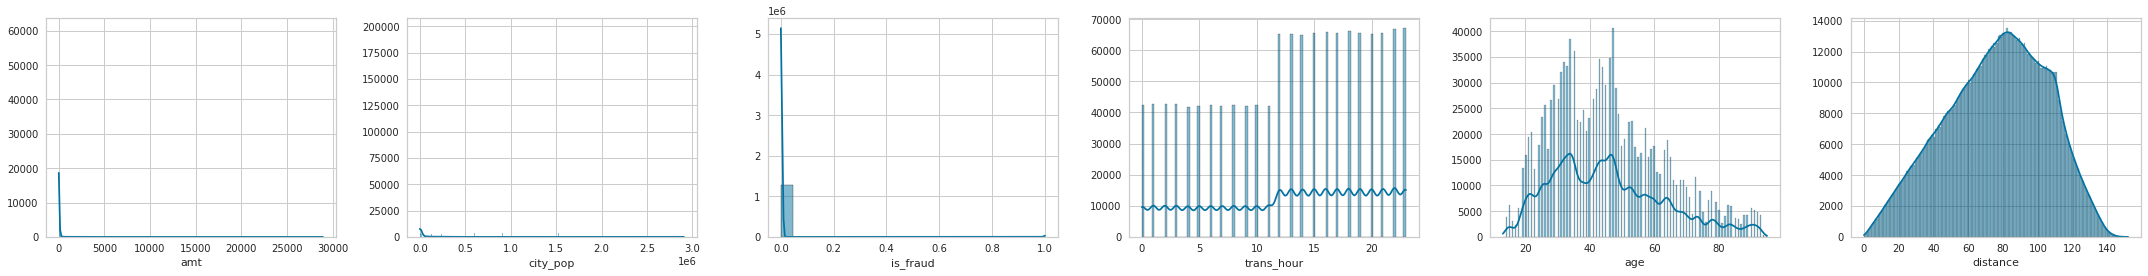

In [46]:
# Tạo danh sách 'numerical_columns' chứa tất cả các cột dạng số trong DataFrame 'df'
numerical_columns = [col for col in df.select_dtypes(include='number').columns]

# Sử dụng hàm 'plot_numerical_features' để vẽ histogram cho từng cột số trong danh sách 'numerical_columns'
plot_numerical_features(df, numerical_columns)

In [47]:
def plot_categorical_features(df, features):
    fig, axes = plt.subplots(len(features),1, figsize=(7,33))
    for i, ax in enumerate(axes.flat):
        sns.countplot(y=features[i],data=df, ax=ax, palette='Set2')
    plt.tight_layout()
    plt.show()

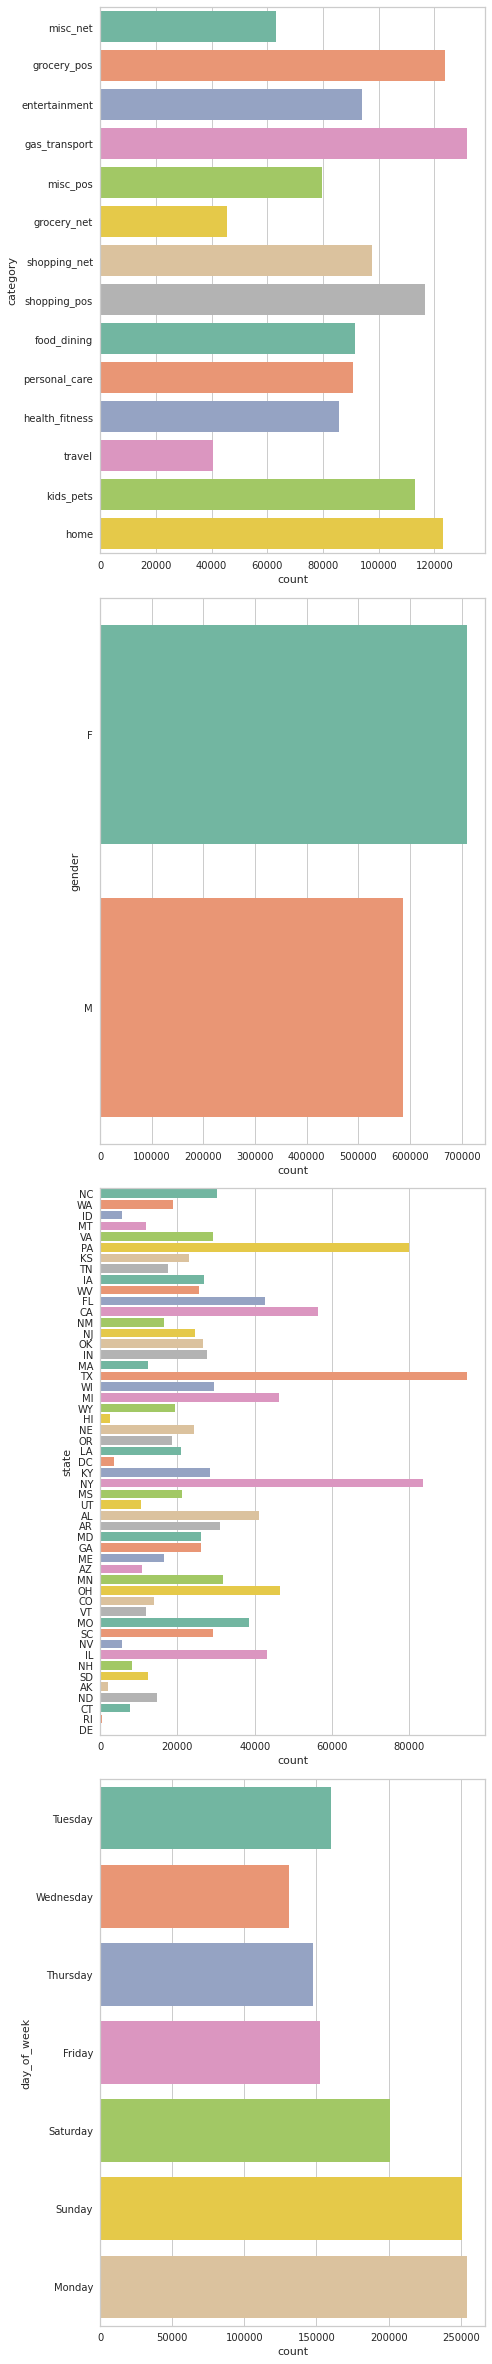

In [48]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in df.select_dtypes(include='object').columns]

# Sử dụng hàm 'plot_categorical_features' để vẽ biểu đồ đếm cho các cột phân loại trong danh sách 'categorical_features'
plot_categorical_features(df, categorical_features)

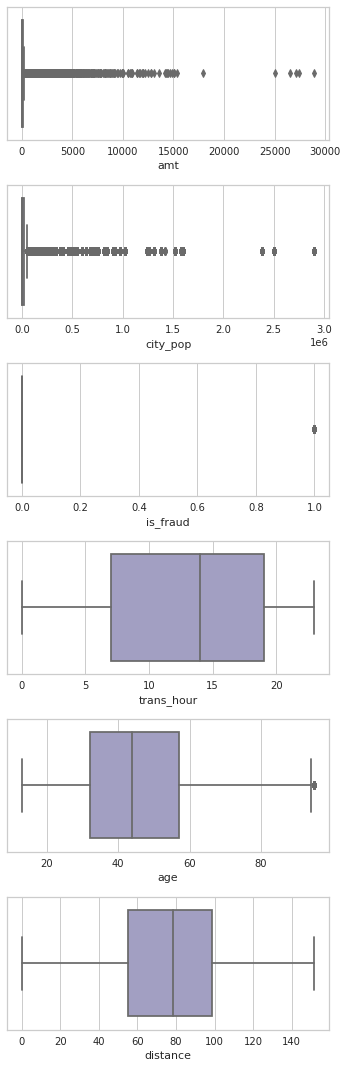

In [49]:
def plot_boxplot(df, features):
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(len(features), 1, figsize=(5, 15), sharey=True)
    for i, ax in enumerate(axs.flat):
        sns.boxplot(x=features[i], data=df, palette='Purples', ax=ax)
        ax.set_xlabel(features[i])

    plt.tight_layout()
    plt.show()

plot_boxplot(df, numerical_columns)

Text(0.5, 1.0, 'Difference: Fraudulent vs Non-Fraudulent Transactions in Each Spending Category')

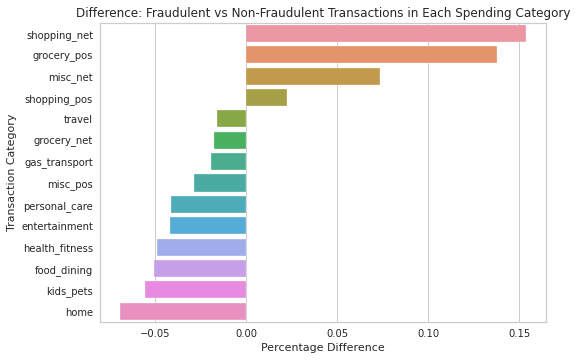

In [50]:
# Tính phần trăm khác biệt
not_fraud_percent = df[df['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
not_fraud_percent.columns = ['category', 'not fraud percentage']

fraud_percent = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud_percent.columns = ['category', 'fraud percentage']

diff_percent = not_fraud_percent.merge(fraud_percent, on='category')
diff_percent['diff'] = diff_percent['fraud percentage'] - diff_percent['not fraud percentage']

# Vẽ biểu đồ barplot cho phần trăm khác biệt
ax = sns.barplot(y='category', x='diff', data=diff_percent.sort_values('diff', ascending=False))

# Đặt nhãn trục x và trục y, tiêu đề
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Difference: Fraudulent vs Non-Fraudulent Transactions in Each Spending Category')

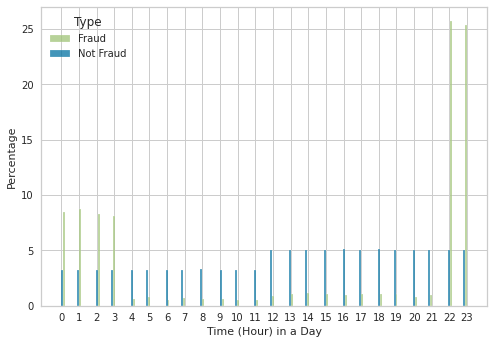

In [51]:
# Vẽ histogram với phần trăm giao dịch gian lận và không gian lận theo giờ trong ngày
ax = sns.histplot(data=df, x="trans_hour", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')

# Đặt nhãn trục x và trục y
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')

# Đặt tick cho trục x (từ 0 đến 23 giờ)
plt.xticks(np.arange(0, 24, 1))

# Tạo chú thích cho biểu đồ
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

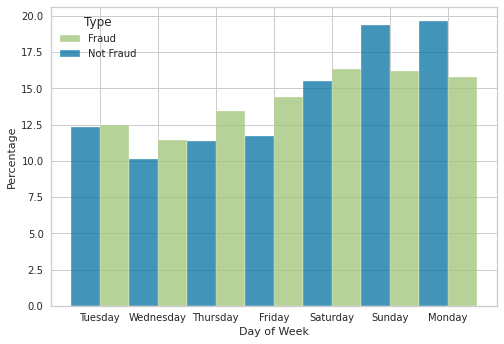

In [52]:
# Vẽ histogram với phần trăm giao dịch gian lận và không gian lận theo ngày trong tuần
ax = sns.histplot(data=df, x="day_of_week", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')

# Đặt nhãn trục x và trục y
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')

# Tạo chú thích cho biểu đồ
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

<AxesSubplot:>

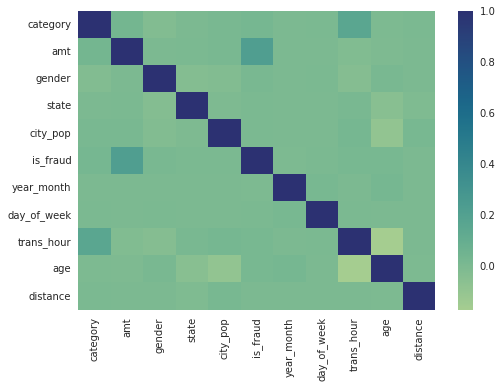

In [53]:
def apply_feature_engineering(df):
    """
    Áp dụng kỹ thuật feature engineering để chuyển đổi dữ liệu phân loại thành dạng số.

    Tham số:
    df (pandas DataFrame): DataFrame đầu vào chứa các cột phân loại

    Trả về:
    pandas DataFrame: DataFrame với các cột phân loại được chuyển đổi thành mã số
    """
    df["category"] = df["category"].astype("category").cat.codes
    df["gender"] = df["gender"].astype("category").cat.codes
    df["state"] = df["state"].astype("category").cat.codes
    df["year_month"] = df["year_month"].astype("category").cat.codes
    df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
    
    return df

# Áp dụng kỹ thuật feature engineering vào DataFrame gốc và DataFrame kiểm tra
df2 = apply_feature_engineering(df.copy())

# Hiển thị độ tương quan sau khi chuẩn hóa dữ liệu bằng biểu đồ heatmap
sns.heatmap(df2.corr(), cmap='crest') # Hiển thị heatmap sau khi chuẩn hóa dữ liệu

In [54]:
df2.head()

category     amt  gender  state  city_pop  is_fraud  year_month  \
0         8    4.97       0     27      3495         0           0   
1         4  107.23       0     47       149         0           0   
2         0  220.11       1     13      4154         0           0   
3         2   45.00       1     26      1939         0           0   
4         9   41.96       1     45        99         0           0   

   day_of_week  trans_hour  age    distance  
0            5           0   30   78.773821  
1            5           0   40   30.216618  
2            5           0   56  108.102912  
3            5           0   52   95.685115  
4            5           0   32   77.702395

## KMeans

In [55]:
# Chuẩn hóa
scaler = StandardScaler()

# Tạo bản sao của DataFrame chứa giao dịch gian lận và loại bỏ cột 'is_fraud' để chuẩn hóa
fraud_df = df2[df2['is_fraud'] == 1].copy()
fraud_df.drop('is_fraud', axis=1, inplace=True)
fraud_df.reset_index(drop=True, inplace=True)

# Thực hiện chuẩn hóa dữ liệu cho các cột số
numerical_cols = ['amt', 'city_pop', 'age', 'distance']
scaled_features = scaler.fit_transform(fraud_df[numerical_cols])

# Tạo DataFrame từ dữ liệu đã chuẩn hóa
fraud_scaled_features = pd.DataFrame(scaled_features, columns=numerical_cols)

# Nối DataFrame đã scale và DataFrame không được scale
fraud_scaled = pd.concat([fraud_df.drop(columns=numerical_cols), fraud_scaled_features], axis=1)


In [56]:
fraud_scaled

category  gender  state  year_month  day_of_week  trans_hour       amt  \
0            4       1     27           0            6           1 -0.640815   
1            2       0     43           0            6           1 -1.330998   
2            4       0     43           0            6           3 -0.652978   
3            2       1     27           0            6           3 -1.342495   
4            4       0     43           0            6           3 -0.654463   
...        ...     ...    ...         ...          ...         ...       ...   
7501        11       0      9          17            3           1  1.141232   
7502        11       0      9          17            3           1  1.740155   
7503         2       1     18          17            3           2 -1.334276   
7504         2       0     43          17            3           3 -1.304957   
7505         2       1     18          17            3           3 -1.334378   

      city_pop       age  distance  
0    -0.295173 -0.971284 -0.254250  
1     4.588809  0.513081  0.075772  
2     4.588809  0.513081 -1.225962  
3    -0.295173 -0.971284 -1.463943  
4     4.588809  0.513081 -1.118870  
...        ...       ...       ...  
7501  0.025604 -0.759232  0.578230  
7502  0.025604 -0.759232  0.275792  
7503 -0.079440 -1.183336  0.652724  
7504 -0.297813  0.088977  1.326978  
7505 -0.079440 -1.183336  2.099661  

[7506 rows x 10 columns]

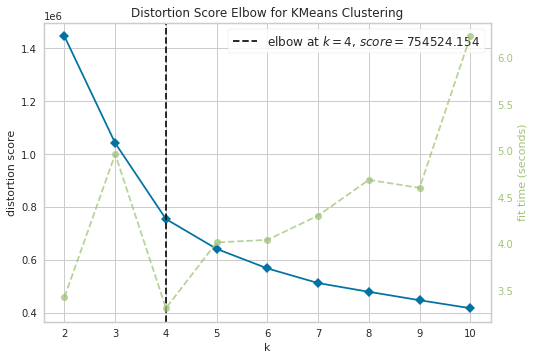

Elbow Method - Optimal number of clusters: 4


In [57]:
# Sử dụng random_seed khi khởi tạo KMeans
elbow_method = KElbowVisualizer(KMeans(n_init = 30), k=(2, 11))
elbow_method.fit(fraud_scaled)
elbow_method.show()

optimal_clusters_elbow = elbow_method.elbow_value_
print("Elbow Method - Optimal number of clusters:", optimal_clusters_elbow)

Ngoài phương pháp Elbow, có thể sử dụng các phương pháp khác để xác định số phân cụm tối ưu trong bài toán phân cụm. Dưới đây là mô tả ngắn về các phương pháp đó:

Calinski-Harabasz Score: Đây là một chỉ số được sử dụng để đo độ tách biệt giữa các cụm. Chỉ số này được tính toán dựa trên tỷ lệ giữa phương sai giữa các cụm và phương sai trong cụm. Số lượng cụm tối ưu tương ứng với giá trị Calinski-Harabasz Score cao nhất.

Silhouette Score: Đây là một chỉ số đo độ tách biệt và độ tương đồng của các điểm dữ liệu trong cụm. Giá trị Silhouette Score cao đồng nghĩa với sự tách biệt tốt giữa các cụm và sự tương đồng tốt trong từng cụm. Số lượng cụm tối ưu là số lượng cụm tương ứng với giá trị Silhouette Score cao nhất.

Davies-Bouldin Index: Chỉ số này đo độ tốt của phân cụm bằng cách tính toán trung bình của độ tương tự giữa mỗi cụm và các cụm khác. Số lượng cụm tối ưu tương ứng với giá trị Davies-Bouldin Index thấp nhất.

In [58]:
optimal_clusters_ch = None
optimal_clusters_silhouette = None
optimal_clusters_db = None
max_score_ch = float('-inf')
max_score_silhouette = float('-inf')
min_score_db = float('inf')

for k in range(2, 11):
    kmeans = KMeans(n_init=30,n_clusters=k)
    kmeans.fit(fraud_scaled)
    labels = kmeans.labels_

    # Calinski-Harabasz Score
    ch_score = calinski_harabasz_score(fraud_scaled, labels)
    if ch_score > max_score_ch:
        max_score_ch = ch_score
        optimal_clusters_ch = k

    # Silhouette Score
    silhouette = silhouette_score(fraud_scaled, labels)
    if silhouette > max_score_silhouette:
        max_score_silhouette = silhouette
        optimal_clusters_silhouette = k

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(fraud_scaled, labels)
    if db_score < min_score_db:
        min_score_db = db_score
        optimal_clusters_db = k

# Print the results
print("Optimal number of clusters (Calinski-Harabasz Score):", optimal_clusters_ch)
print("Optimal number of clusters (Silhouette Score):", optimal_clusters_silhouette)
print("Optimal number of clusters (Davies-Bouldin Index):", optimal_clusters_db)

Optimal number of clusters (Calinski-Harabasz Score): 4
Optimal number of clusters (Silhouette Score): 4
Optimal number of clusters (Davies-Bouldin Index): 3


In [59]:
# Khởi tạo và fit mô hình KMeans với số cụm tối ưu đã chọn
kmeans_model = KMeans(n_clusters=optimal_clusters_elbow,n_init=30, random_state=42)
kmeans_model.fit(fraud_scaled)

KMeans(n_clusters=4, n_init=30, random_state=42)

## Hierarchy

In [60]:
from sklearn.cluster import AgglomerativeClustering

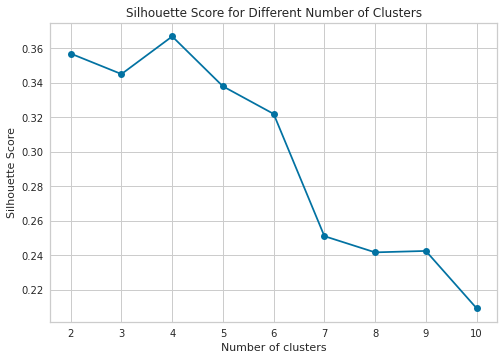

In [61]:
silhouette_scores = []
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agg_labels = model.fit_predict(fraud_scaled)
    silhouette_avg = silhouette_score(fraud_scaled, agg_labels)
    silhouette_scores.append(silhouette_avg)

# Vẽ biểu đồ silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.show()

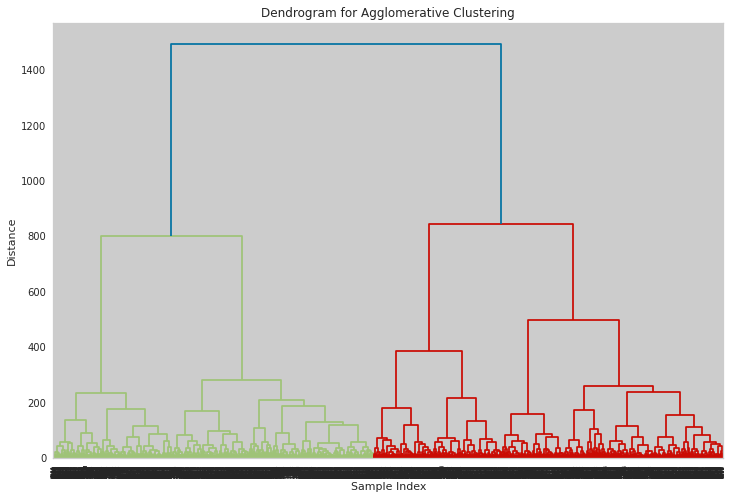

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sử dụng Agglomerative Clustering để phân cụm dữ liệu
agg_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_model.fit_predict(fraud_scaled)

# Tạo ma trận linkage
Z = linkage(fraud_scaled, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [63]:
# Sử dụng Counter để đếm số lượng từng nhóm cụm trong mỗi thuật toán
kmeans_counter = Counter(kmeans_model.labels_)
agg_counter = Counter(agg_labels)

# Xác định số lượng các nhóm cụm duy nhất từ mỗi thuật toán
unique_kmeans = set(kmeans_model.labels_)
unique_agg = set(agg_labels)

# Tìm các nhãn cụm chung và sai khác giữa hai thuật toán
common_clusters = unique_kmeans.intersection(unique_agg)
num_correct = sum(min(kmeans_counter[label], agg_counter[label]) for label in common_clusters)
num_different = len(kmeans_model.labels_) + len(agg_labels) - 2 * num_correct

# Tính tỉ lệ sai khác
error_rate = num_different / (len(kmeans_model.labels_) + len(agg_labels))
print("Error rate:", error_rate)

Error rate: 0.15987210231814547


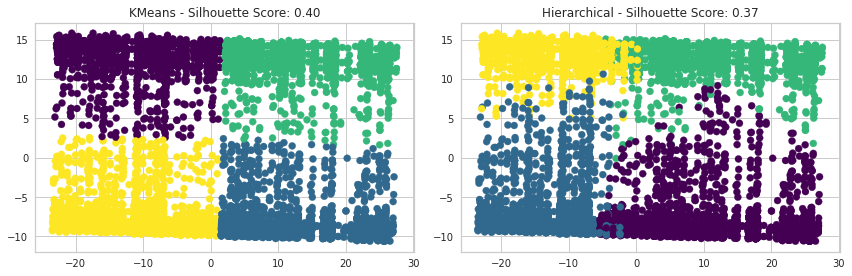

In [64]:
# KMeans
kmeans_silhouette = silhouette_score(fraud_scaled, kmeans_model.labels_)

# Hierarchical Clustering
hierarchical_silhouette = silhouette_score(fraud_scaled, agg_labels)

# Vẽ biểu đồ scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fraud_scaled)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.title(f"KMeans - Silhouette Score: {kmeans_silhouette:.2f}")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title(f"Hierarchical - Silhouette Score: {hierarchical_silhouette:.2f}")

plt.tight_layout()
plt.show()


Dùng thuật toán Kmeans tốt hơn

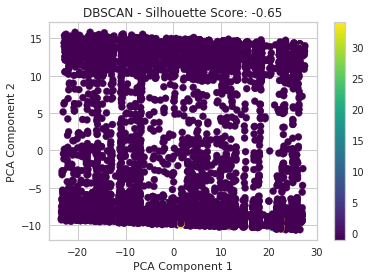

In [65]:
from sklearn.cluster import DBSCAN

# Tìm số cụm tối ưu với DBSCAN
best_silhouette_score = -1
best_dbscan_model = None
best_dbscan_labels = None

for eps in [0.1, 0.5, 1.0, 1.5]:
    for min_samples in [5, 10, 15]:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(fraud_scaled)
        
        n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        if n_clusters_dbscan > 1:  # Chỉ tính Silhouette nếu có ít nhất 2 cụm
            silhouette_avg_dbscan = silhouette_score(fraud_scaled, dbscan_labels)
            if silhouette_avg_dbscan > best_silhouette_score:
                best_silhouette_score = silhouette_avg_dbscan
                best_dbscan_model = dbscan_model
                best_dbscan_labels = dbscan_labels

# Tính toán PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fraud_scaled)

# Vẽ biểu đồ scatter plot cho DBSCAN
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_dbscan_labels, cmap='viridis')
plt.title(f"DBSCAN - Silhouette Score: {best_silhouette_score:.2f}")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


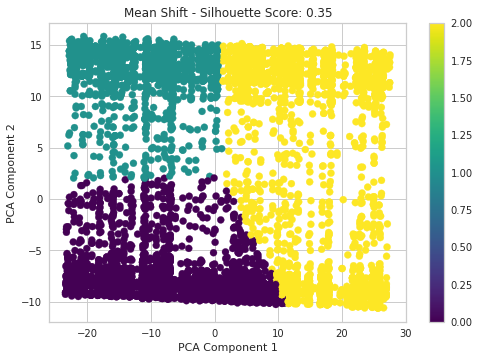

In [66]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Ước lượng bandwidth (băng thông) tối ưu
bandwidth = estimate_bandwidth(fraud_scaled, quantile=0.2, n_samples=500)

# Phân cụm dữ liệu với Mean Shift
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_labels = meanshift.fit_predict(fraud_scaled)

# Tính toán điểm Silhouette cho Mean Shift
meanshift_silhouette = silhouette_score(fraud_scaled, meanshift_labels)

# Vẽ biểu đồ scatter plot cho Mean Shift
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fraud_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=meanshift_labels, cmap='viridis')
plt.title(f"Mean Shift - Silhouette Score: {meanshift_silhouette:.2f}")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


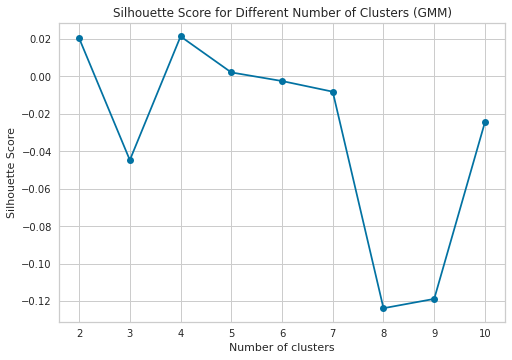

Best GMM cluster: 4


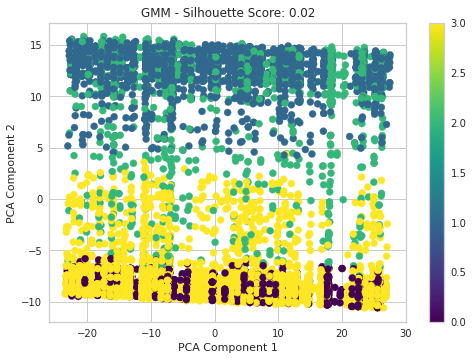

In [67]:
from sklearn.mixture import GaussianMixture

# Tìm số cụm tối ưu với GMM
silhouette_scores_gmm = []
for n_clusters in range(2, 11):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(fraud_scaled)
    
    silhouette_avg_gmm = silhouette_score(fraud_scaled, gmm_labels)
    silhouette_scores_gmm.append(silhouette_avg_gmm)

# Vẽ biểu đồ silhouette scores
plt.plot(range(2, 11), silhouette_scores_gmm, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters (GMM)')
plt.show()

# Chọn số cụm tốt nhất từ biểu đồ
best_n_clusters_gmm = silhouette_scores_gmm.index(max(silhouette_scores_gmm)) + 2  # +2 vì range từ 2 đến 10

print(f"Best GMM cluster: { best_n_clusters_gmm}")
# Phân cụm dữ liệu với GMM sử dụng số cụm tốt nhất
best_gmm = GaussianMixture(n_components=best_n_clusters_gmm, random_state=42)
best_gmm_labels = best_gmm.fit_predict(fraud_scaled)

# Tính toán điểm Silhouette cho GMM
gmm_silhouette = silhouette_score(fraud_scaled, best_gmm_labels)

# Vẽ biểu đồ scatter plot cho GMM
pca = PCA(n_components=2)
X_pca = pca.fit_transform(fraud_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_gmm_labels, cmap='viridis')
plt.title(f"GMM - Silhouette Score: {gmm_silhouette:.2f}")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [68]:
# Sử dụng PCA để giảm chiều dữ liệu và tính toán phương sai được giải thích bởi các thành phần
from sklearn.decomposition import PCA 
pca = PCA(n_components=len(fraud_df.columns)) 
pca.fit(fraud_scaled)
pca.explained_variance_ratio_ * 100

array([58.58790504, 28.28732077,  7.96627933,  3.02018045,  1.07053564,
        0.29233782,  0.28753802,  0.27459383,  0.14409981,  0.06920929])

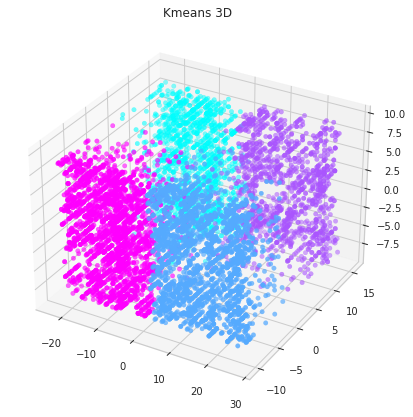

In [69]:
# Sử dụng PCA với 3 thành phần để trực quan hóa dữ liệu
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(fraud_scaled), columns=["pca1", "pca2", "pca3"])
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
scatter = ax.scatter(pca_df.pca1, pca_df.pca2, pca_df.pca3, c=kmeans_model.labels_, cmap="cool")
plt.title("Kmeans 3D")
plt.show()

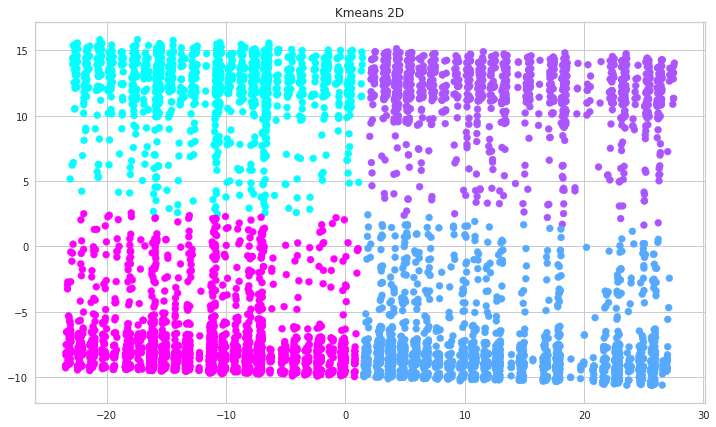

In [70]:
# Sử dụng PCA với 2 thành phần để trực quan hóa dữ liệu
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(fraud_scaled), columns=["pca1", "pca2"])
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter = ax.scatter(pca_df.pca1, pca_df.pca2, c=kmeans_model.labels_, cmap="cool")
plt.title("Kmeans 2D")
plt.show()

In [71]:
# Tạo DataFrame mới chứa thông tin cụm
clusters = pd.concat([fraud_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

In [72]:
cluster = kmeans_model.labels_
cluster_0 = np.where(cluster==0) #index các data samples thuộc cluster 1
cluster_1 = np.where(cluster==1) #index các data samples thuộc cluster 2
cluster_2 = np.where(cluster==2) #index các data samples thuộc cluster 3
cluster_3 = np.where(cluster==3) #index các data samples thuộc cluster 4

In [73]:
## Giả sử 'labels' là nhãn cụm được gán bởi thuật toán phân cụm
labels = kmeans_model.labels_

# Tạo một DataFrame trống để lưu trữ các mẫu ngẫu nhiên từ mỗi cụm
random_samples = pd.DataFrame()

# Lặp qua từng cụm và chọn một số data samples từ mỗi cụm
num_samples_per_cluster = 5  # Số lượng mẫu trong mỗi cụm muốn chọn
num_clusters = len(np.unique(labels))  # Số lượng cụm

for cluster in range(num_clusters):
    cluster_samples = clusters[labels == cluster].sample(n=num_samples_per_cluster, random_state=2024)  # Lấy ngẫu nhiên các mẫu thuộc cụm hiện tại
    random_samples = pd.concat([random_samples, cluster_samples])

# Hiển thị DataFrame chứa các mẫu ngẫu nhiên từ mỗi cụm
random_samples

category      amt  gender  state  city_pop  year_month  day_of_week  \
3070         8   825.45       1     47       895           7            2   
3544         4   309.49       0     45    242803           8            0   
2489         8   773.63       0     43    144160           5            6   
307          2    15.27       0     45    136895           0            2   
2915         2    10.06       1     34   1382480           6            2   
2704         0   374.08       0      9    717255           6            2   
6199        11  1013.74       0     16    163415          14            4   
6749        11   960.87       1     22      7339          16            5   
6463        11   952.38       1      4    105549          15            5   
6327        11  1025.97       1      2      1383          14            5   
5686        11   942.21       0     23    753116          13            6   
115          9   830.58       0     21      1643           0            0   
4977         3     6.42       0     11      1490          11            3   
3368         2    11.44       1      4    757530           8            3   
4432         4   298.61       1     23      1680          10            5   
4118        11   958.76       1     43   2906700           9            3   
3249         4   307.29       1     41      1126           7            3   
3355         8   854.92       0     47       584           7            2   
1261         4   311.53       1     50        49           2            0   
3958         9     9.14       1     35      2644           9            2   

      trans_hour  age    distance  cluster  
3070           8   20   85.086163        0  
3544           2   56   57.376095        0  
2489           1   35  126.921437        0  
307            7   79   73.123549        0  
2915           2   28  125.544371        0  
2704          22   52   59.384137        1  
6199          22   15   81.462395        1  
6749          20   58   73.744381        1  
6463          23   46   88.443259        1  
6327          22   53  112.316945        1  
5686           1   48   51.574913        2  
115            7   42   75.085693        2  
4977           0   28   59.947769        2  
3368           0   40   81.992720        2  
4432           0   42   63.007234        2  
4118          22   23   87.573550        3  
3249          22   39   40.741307        3  
3355          20   50   45.431828        3  
1261          16   37   24.386973        3  
3958          23   38   82.606651        3

In [74]:
pd.options.display.float_format = '{:.3f}'.format
df_cluster_summary = clusters.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')
df_cluster_summary

cluster     Metrics          0         1          2         3
Column Name                                                  
category       mean      4.720     8.846      4.783     8.880
amt            mean    347.888   651.490    343.513   647.607
gender         mean      0.440     0.554      0.475     0.514
state          mean     38.430    13.524     13.096    38.315
city_pop       mean 122236.682 82644.093 104552.974 89846.794
year_month     mean      8.282     8.168      7.940     8.436
day_of_week    mean      2.858     2.856      2.827     2.755
trans_hour     mean      2.353    21.485      2.214    21.538
age            mean     45.303    50.401     45.113    50.216
distance       mean     75.121    75.943     76.010    77.372

In [75]:
pd.options.display.float_format = '{:.3f}'.format
df_cluster_summary = clusters.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == '50%'].set_index('Column Name')
df_cluster_summary

cluster     Metrics        0        1        2        3
Column Name                                            
category        50%    4.000   11.000    4.000   11.000
amt             50%  305.800  807.530  303.920  809.640
gender          50%    0.000    1.000    0.000    1.000
state           50%   38.000   14.000   14.000   38.000
city_pop        50% 3212.500 2566.000 4198.000 2208.000
year_month      50%    8.000    8.000    8.000    9.000
day_of_week     50%    3.000    3.000    3.000    3.000
trans_hour      50%    2.000   22.000    2.000   22.000
age             50%   44.000   51.000   43.000   49.000
distance        50%   77.383   76.697   77.549   79.860

In [76]:
print(df_mapping.columns)
print(clusters.columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_month', 'day_of_week'],
      dtype='object')
Index(['category', 'amt', 'gender', 'state', 'city_pop', 'year_month',
       'day_of_week', 'trans_hour', 'age', 'distance', 'cluster'],
      dtype='object')


In [77]:
data1 = df_mapping[df_mapping['is_fraud'] == 1]  
data1.reset_index(drop=True, inplace=True)
drop_cols = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'zip','lat',
       'long', 'dob', 'trans_num', 'unix_time', 'merch_lat','merch_long', 'is_fraud']
data1.drop(drop_cols, axis=1, inplace=True)
data1.reset_index(drop=True, inplace=True)  

# Tạo một list chứa các cột bạn muốn thêm từ clusters vào data1
columns_to_add = [ 'trans_hour', 'age', 'distance', 'cluster']

# Thêm các cột từ clusters vào data1
merged_data = pd.concat([data1, clusters[columns_to_add]], axis=1)
merged_data['year_month'] = merged_data['year_month'].astype(str)

In [78]:
merged_data

merchant       category      amt gender  \
0                   Rutherford-Mertz    grocery_pos  281.060      M   
1         Jenkins, Hauck and Friesen  gas_transport   11.520      F   
2                   Goodwin-Nitzsche    grocery_pos  276.310      F   
3                   Erdman-Kertzmann  gas_transport    7.030      M   
4                        Koepp-Parke    grocery_pos  275.730      F   
...                              ...            ...      ...    ...   
7501                    Kassulke PLC   shopping_net  977.010      F   
7502                      Schumm PLC   shopping_net 1210.910      F   
7503  Tillman, Dickinson and Labadie  gas_transport   10.240      M   
7504                  Corwin-Collins  gas_transport   21.690      F   
7505                   Koss and Sons  gas_transport   10.200      M   

                city state  city_pop                       job year_month  \
0      Collettsville    NC       885            Soil scientist    2019-01   
1        San Antonio    TX   1595797  Horticultural consultant    2019-01   
2        San Antonio    TX   1595797  Horticultural consultant    2019-01   
3      Collettsville    NC       885            Soil scientist    2019-01   
4        San Antonio    TX   1595797  Horticultural consultant    2019-01   
...              ...   ...       ...                       ...        ...   
7501      Vero Beach    FL    105638         Librarian, public    2020-06   
7502      Vero Beach    FL    105638         Librarian, public    2020-06   
7503  Denham Springs    LA     71335                 Herbalist    2020-06   
7504         Notrees    TX        23            Cytogeneticist    2020-06   
7505  Denham Springs    LA     71335                 Herbalist    2020-06   

     day_of_week  trans_hour  age  distance  cluster  
0      Wednesday           1   30    68.963        0  
1      Wednesday           1   58    78.443        0  
2      Wednesday           3   58    41.048        0  
3      Wednesday           3   30    34.212        0  
4      Wednesday           3   58    44.125        0  
...          ...         ...  ...       ...      ...  
7501      Sunday           1   34    92.877        2  
7502      Sunday           1   34    84.189        2  
7503      Sunday           2   26    95.017        2  
7504      Sunday           3   50   114.386        0  
7505      Sunday           3   26   136.583        2  

[7506 rows x 14 columns]

Cluster 1


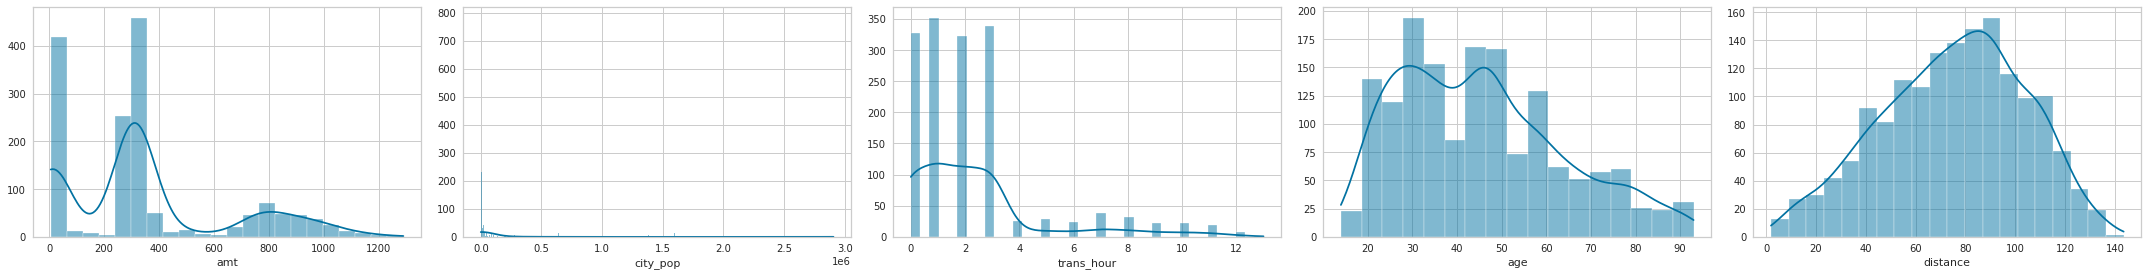

Cluster 2


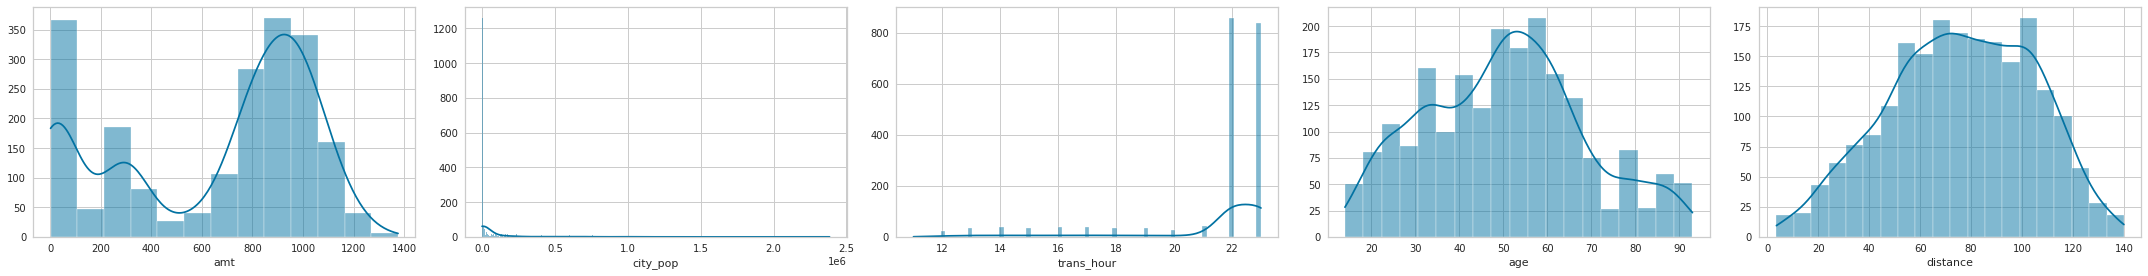

Cluster 3


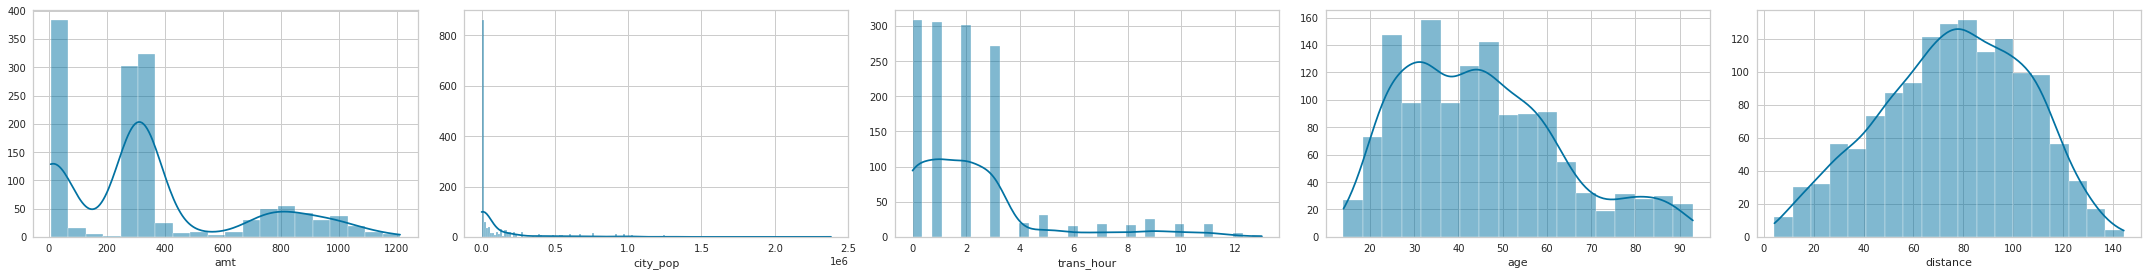

Cluster 4


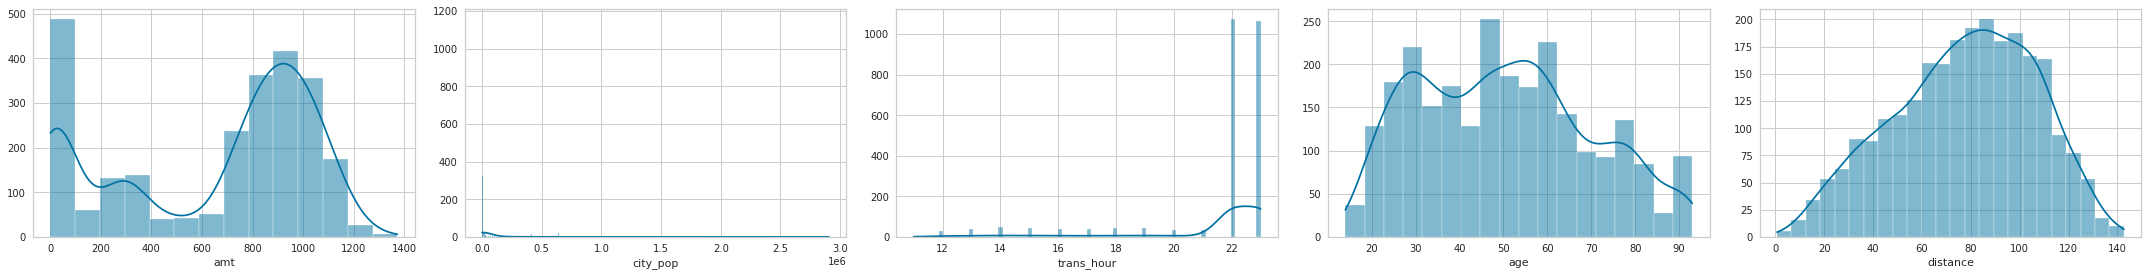

In [79]:
# Tìm tất cả các cột số trong DataFrame 'clusters' mà không phải là 'cluster'
numerical_columns = [col for col in merged_data.select_dtypes(include='number').columns if col != 'cluster']

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

# Duyệt qua từng giá trị cụm
for cluster_value in cluster_values:
    print(f"Cluster {cluster_value + 1}")  # In ra thông tin về cụm hiện tại
    cluster_data = merged_data[merged_data['cluster'] == cluster_value]  # Lọc dữ liệu cho cụm hiện tại
    plot_numerical_features(cluster_data, numerical_columns)

In [80]:
def plot_boxplot2(df, features, cl):
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(len(features), 1, figsize=(15, 12), sharey=True)
    for i, ax in enumerate(axs.flat):
        sns.boxplot(x=features[i], data=df, palette=cl, ax=ax)
        ax.set_xlabel(features[i])
        
        # Tính các giá trị thống kê
        medians = df[features[i]].median()
        q1 = df[features[i]].quantile(0.25)
        q3 = df[features[i]].quantile(0.75)
        iqr = q3 - q1
        lower_threshold = q1 - 1.5 * iqr
        upper_threshold = q3 + 1.5 * iqr
        min_val = df[features[i]].min()
        max_val = df[features[i]].max()
        percentile_95 = df[features[i]].quantile(0.95)
        percentile_5 = df[features[i]].quantile(0.05)
        avg = df[features[i]].mean()
        
        stats_text = f'Avg: {avg:.2f}\nMedian: {medians:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}\nQ1 (25th percentile): {q1:.2f}\nQ3 (75th percentile): {q3:.2f}\n5th percentile: {percentile_5:.2f}\n95th percentile: {percentile_95:.2f}\nLower Threshold: {lower_threshold:.2f}\nUpper Threshold: {upper_threshold:.2f}'

        ax.text(1.2, 0.95, stats_text,
                transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
    plt.tight_layout()
    plt.show()

In [81]:
def plot_categorical_features2(df, features, top_n=20):
    fig, axes = plt.subplots(len(features), 1, figsize=(25, 5*len(features))) # Đặt kích thước của hình ảnh dọc
    for i, ax in enumerate(axes.flat):
        category_count = df[features[i]].value_counts().nlargest(top_n)  # Lấy ra top_n giá trị cao nhất
        category_order = category_count.index.tolist()  # Lấy danh sách các giá trị đã được sắp xếp
        sns.countplot(x=features[i], data=df, ax=ax, palette='Set2', order=category_order) # Vẽ đồ thị

        # Thêm chú thích số liệu lên từng cột
        for p in ax.patches:
            ax.annotate(f'\n{p.get_height()}', (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')

    plt.tight_layout()
    plt.show()

In [82]:
def plot_numerical_features2(df, features):
    num_plots = len(features)
    num_rows = num_plots // 4 + (num_plots % 4 > 0)  # Số hàng cần vẽ

    fig, axes = plt.subplots(num_rows, 4, figsize=(30, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.histplot(x=df[col], ax=axes[i], kde=True)
        axes[i].set_ylabel("")  # Loại bỏ nhãn trục y để giảm độ dày của biểu đồ

    # Ẩn các trục không cần thiết
    for j in range(num_plots, num_rows * 4):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [83]:
import plotly.express as px
import numpy as np
from scipy.stats import gaussian_kde

def plot_numerical_features_plotly(df, features):
    for feature in features:
        data = df[feature]

        # Tính toán KDE
        kde = gaussian_kde(data)
        kde_values = kde.evaluate(np.linspace(data.min(), data.max(), 100))

        # Tạo histogram từ Plotly Express
        fig = px.histogram(df, x=feature, marginal="rug", opacity=0.7, histnorm='probability density')

        # Thêm đường cong KDE từ Plotly Express
        fig.add_scatter(x=np.linspace(data.min(), data.max(), 100), y=kde_values, mode='lines', name='KDE', line=dict(color='red'))
        fig.update_layout(title=f"Histogram with KDE of {feature}", xaxis_title=feature)
        fig.show()


Cluster 1: 


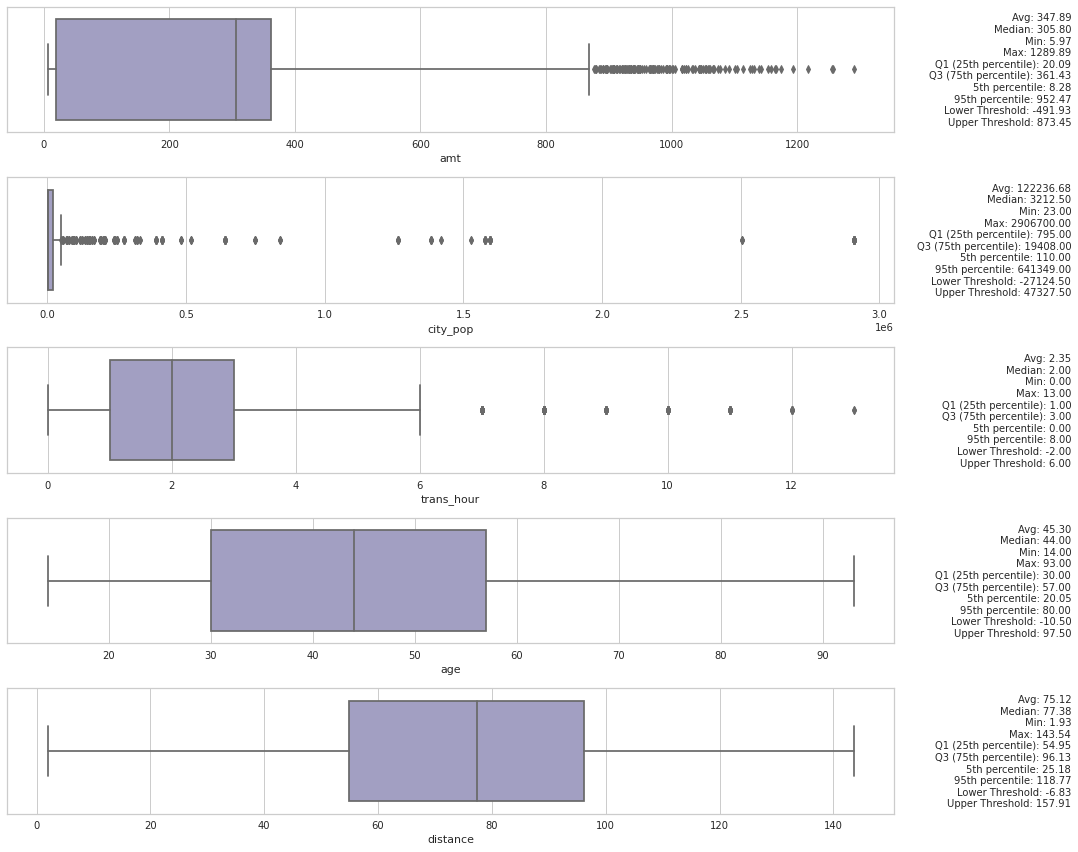

Cluster 2: 


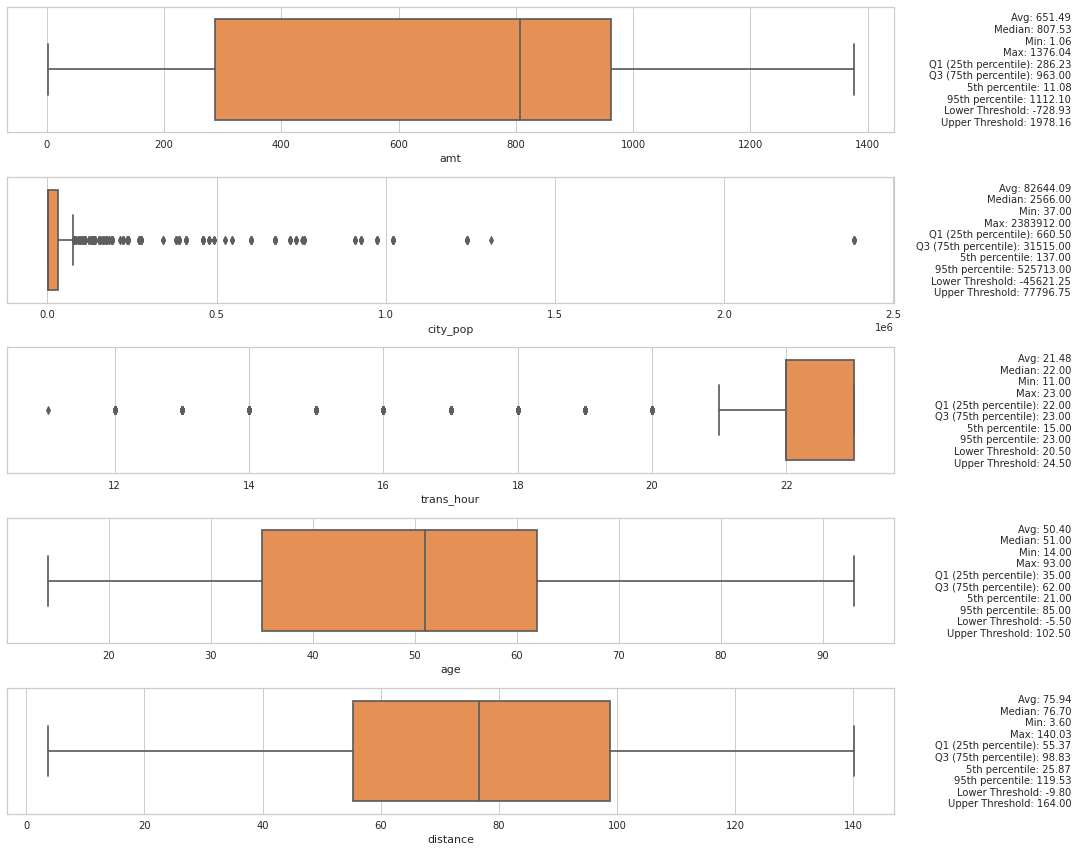

Cluster 3: 


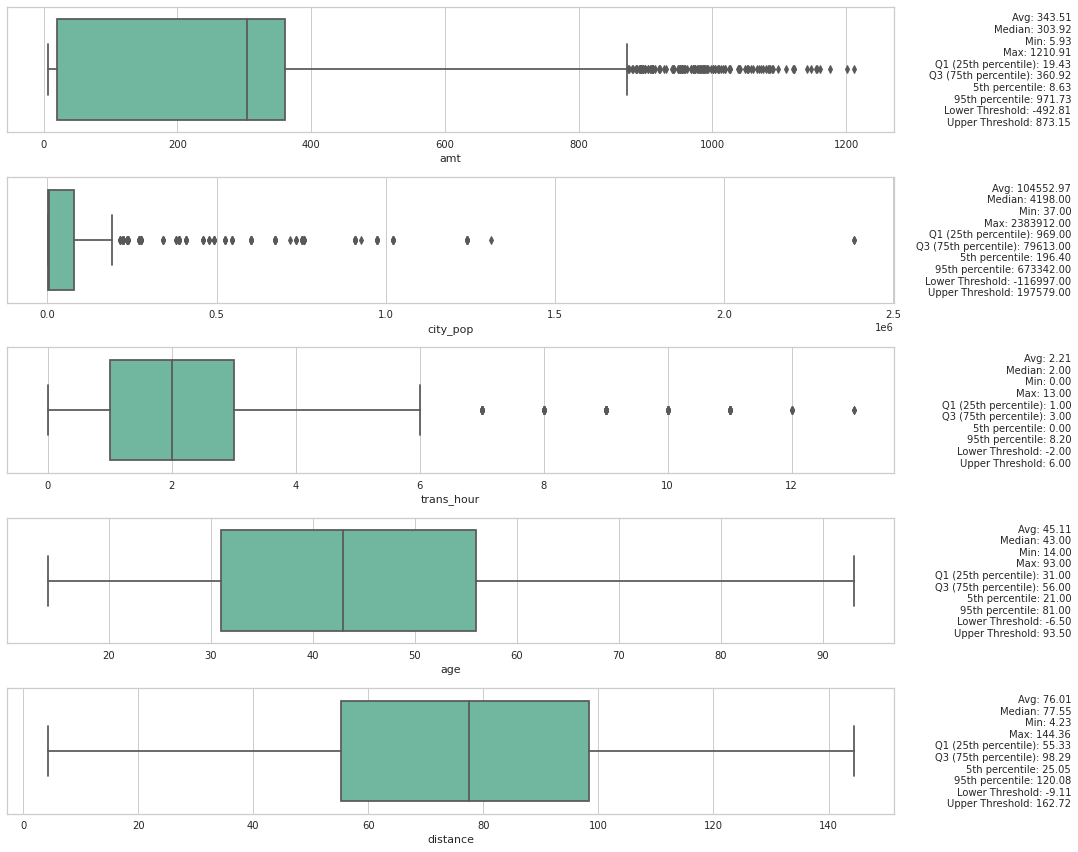

Cluster 4: 


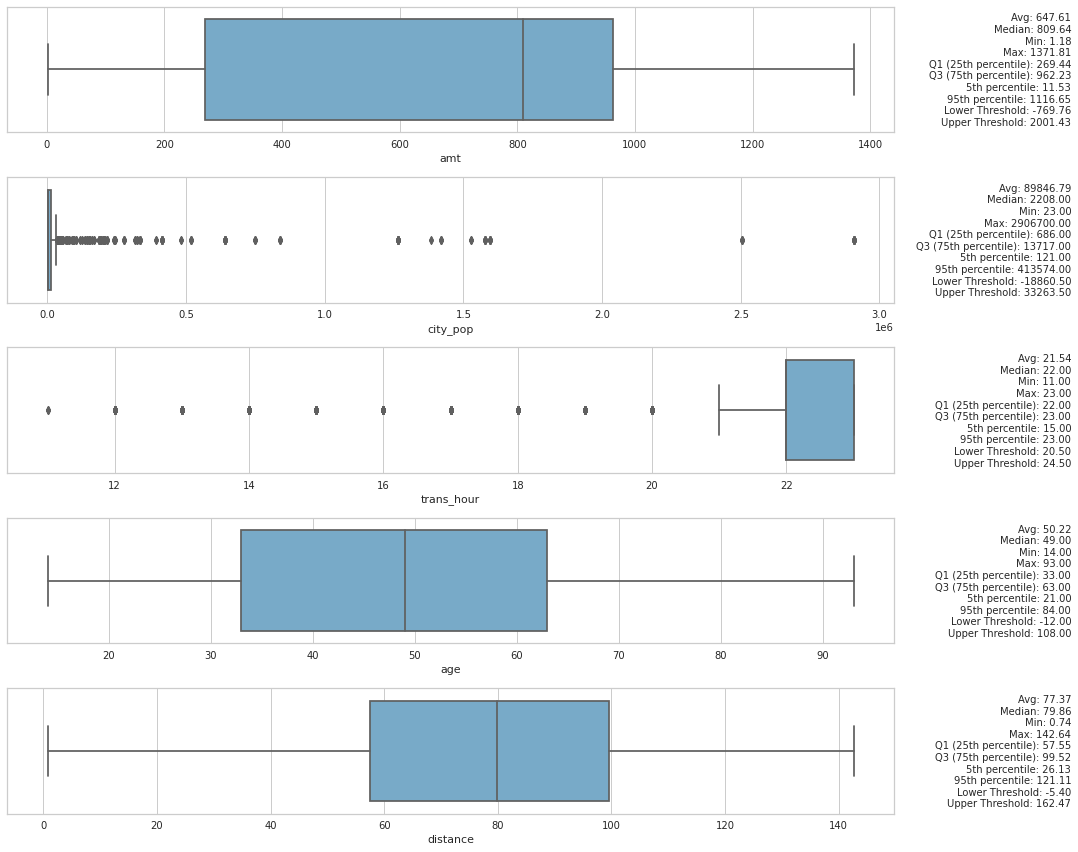

In [84]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data.select_dtypes(include='number').columns  if col not in ['cluster']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] ==  0]  # Lọc dữ liệu cho cụm hiện tại
print('Cluster 1: ')
plot_boxplot2(cluster_data, numerical_columns, 'Purples')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

cluster_data = merged_data[merged_data['cluster'] ==  1]  # Lọc dữ liệu cho cụm hiện tại
print('Cluster 2: ')
plot_boxplot2(cluster_data, numerical_columns, 'Oranges')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

cluster_data = merged_data[merged_data['cluster'] ==  2]  # Lọc dữ liệu cho cụm hiện tại
print('Cluster 3: ')
plot_boxplot2(cluster_data, numerical_columns, 'BuGn')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

cluster_data = merged_data[merged_data['cluster'] ==  3]  # Lọc dữ liệu cho cụm hiện tại
print('Cluster 4: ')
plot_boxplot2(cluster_data, numerical_columns, 'Blues')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [85]:
# Tạo một bản sao của DataFrame để làm việc
df_copy = merged_data.copy()

# Tính IQR riêng cho cụm 0 và 2 dựa trên cột "amt"
q1_cluster_0 = df_copy[df_copy['cluster'] == 0]['amt'].quantile(0.25)
q3_cluster_0 = df_copy[df_copy['cluster'] == 0]['amt'].quantile(0.75)
iqr_cluster_0 = q3_cluster_0 - q1_cluster_0

q1_cluster_2 = df_copy[df_copy['cluster'] == 2]['amt'].quantile(0.25)
q3_cluster_2 = df_copy[df_copy['cluster'] == 2]['amt'].quantile(0.75)
iqr_cluster_2 = q3_cluster_2 - q1_cluster_2

# Tạo cột "cluster2" và gán giá trị mặc định là 0
df_copy['cluster2'] = '0'
df_copy.loc[(df_copy['cluster'] == 1) , 'cluster2'] = '1'
df_copy.loc[(df_copy['cluster'] == 3) , 'cluster2'] = '3'

# Gán giá trị "0.1" cho các dữ liệu không phải outlier của cụm 0
df_copy.loc[(df_copy['cluster'] == 0) & ~((df_copy['amt'] < q1_cluster_0 - 1.5 * iqr_cluster_0) | (df_copy['amt'] > q3_cluster_0 + 1.5 * iqr_cluster_0)), 'cluster2'] = '0.1'

# Gán giá trị "0.2" cho các dữ liệu outlier của cụm 0
df_copy.loc[(df_copy['cluster'] == 0) & ((df_copy['amt'] < q1_cluster_0 - 1.5 * iqr_cluster_0) | (df_copy['amt'] > q3_cluster_0 + 1.5 * iqr_cluster_0)), 'cluster2'] = '0.2'

# Gán giá trị "2.1" cho các dữ liệu không phải outlier của cụm 2
df_copy.loc[(df_copy['cluster'] == 2) & ~((df_copy['amt'] < q1_cluster_2 - 1.5 * iqr_cluster_2) | (df_copy['amt'] > q3_cluster_2 + 1.5 * iqr_cluster_2)), 'cluster2'] = '2.1'

# Gán giá trị "2.2" cho các dữ liệu outlier của cụm 2
df_copy.loc[(df_copy['cluster'] == 2) & ((df_copy['amt'] < q1_cluster_2 - 1.5 * iqr_cluster_2) | (df_copy['amt'] > q3_cluster_2 + 1.5 * iqr_cluster_2)), 'cluster2'] = '2.2'

# In ra 5 dòng cuối cùng của dữ liệu để kiểm tra
df_copy.tail()

merged_data2 = df_copy.copy()

In [86]:
from IPython.display import display, HTML

# Tính số lượng giao dịch theo từng nhóm và theo phạm vi độ tuổi cụ thể
age_ranges = {
    'Under 15': (merged_data2['age'].min(), 14),
    '15-24': (15, 24),
    '25-34': (25, 34),
    '35-44': (35, 44),
    '45-54': (45, 54),
    '55-64': (55, 64),
    '64+': (65, merged_data2['age'].max())
}

# Khởi tạo một DataFrame rỗng
result_df = pd.DataFrame(columns=['Age Range', 'Cluster', 'Transactions', 'Percentage'])

for group, age_range in age_ranges.items():
    transactions_age_range = merged_data2[
        (merged_data2['age'] >= age_range[0]) & (merged_data2['age'] <= age_range[1])
    ].groupby('cluster2').size()

    total_transactions_age_range = transactions_age_range.sum()
    percentage_age_range = (transactions_age_range / total_transactions_age_range) * 100

    # Tạo DataFrame tạm thời để thêm vào result_df
    temp_df = pd.DataFrame({
        'Age Range': [group] * len(transactions_age_range),
        'Cluster': transactions_age_range.index,
        'Transactions': transactions_age_range.values,
        'Percentage': percentage_age_range.values
    })

    result_df = pd.concat([result_df, temp_df], ignore_index=True)

# Tạo hàm để tô màu Max và Min Percentage
def highlight_max_min_percentage(s):
    max_val = s.max()
    min_val = s.min()

    styles = []
    for val in s:
        if val == max_val:
            styles.append('background-color: #FF3366')  # Tô màu ô có giá trị cao nhất
        elif val == min_val:
            styles.append('background-color: #99FFFF')  # Tô màu ô có giá trị thấp nhất
        else:
            styles.append('')  # Giữ nguyên các ô còn lại

    return styles

# Tạo DataFrame mới để tô màu cho từng nhóm trong mỗi nhóm Age Range
color_dict = {
    'Under 15': 'lightblue',
    '15-24': 'lightgreen',
    '25-34': 'lightcoral',
    '35-44': 'lightyellow',
    '45-54': 'lightpink',
    '55-64': 'lightskyblue',
    '64+': 'lightgrey'
}

def highlight_age_range(val):
    return f'background-color: {color_dict[val]}'

styled_result_df = result_df.style.applymap(highlight_age_range, subset=['Age Range'])
grouped_percentage = result_df.groupby('Age Range')['Percentage']

for name, group in grouped_percentage:
    styled_result_df.apply(highlight_max_min_percentage, 
                           subset=pd.IndexSlice[group.index, ['Percentage']])

# Hiển thị bảng kết quả
display(HTML(styled_result_df.render()))

## Cluster 1

### Cluster 1.1 ( ~ Outlier )

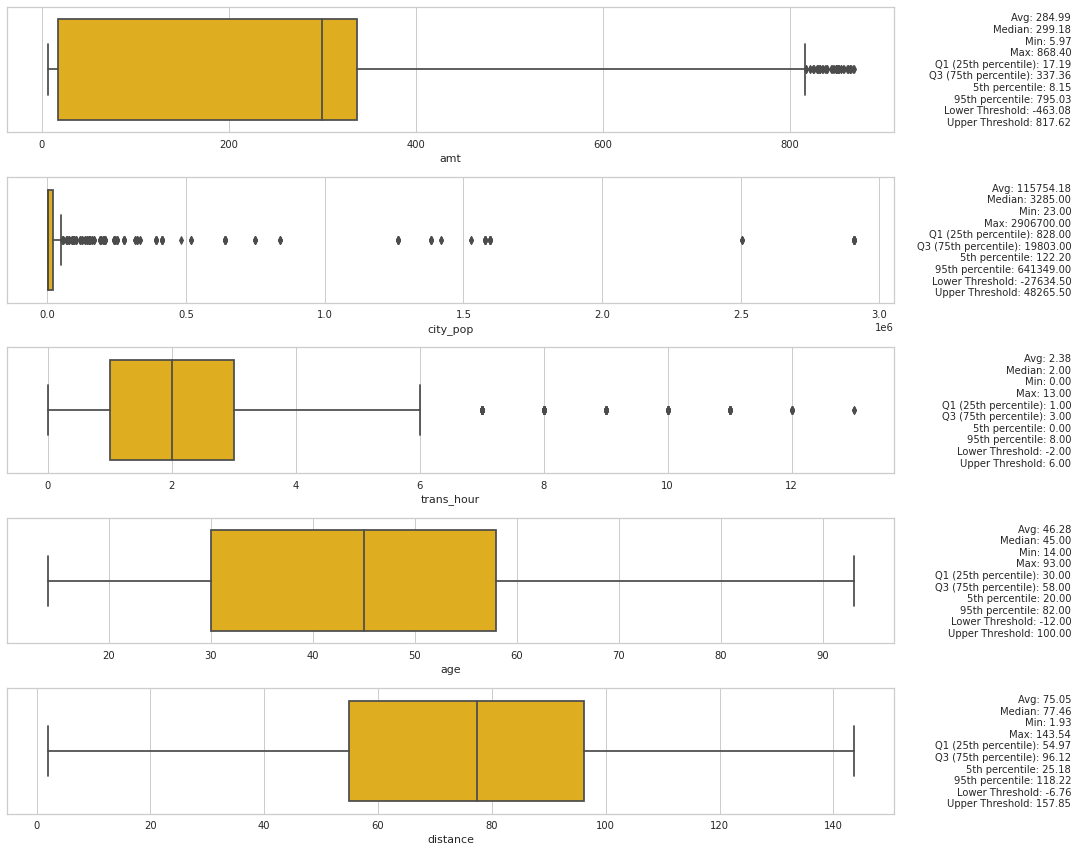

In [87]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data2.select_dtypes(include='number').columns  if col not in ['cluster', 'cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] ==  '0.1']  # Lọc dữ liệu cho cụm hiện tại
plot_boxplot2(cluster_data, numerical_columns, 'Wistia')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [88]:
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

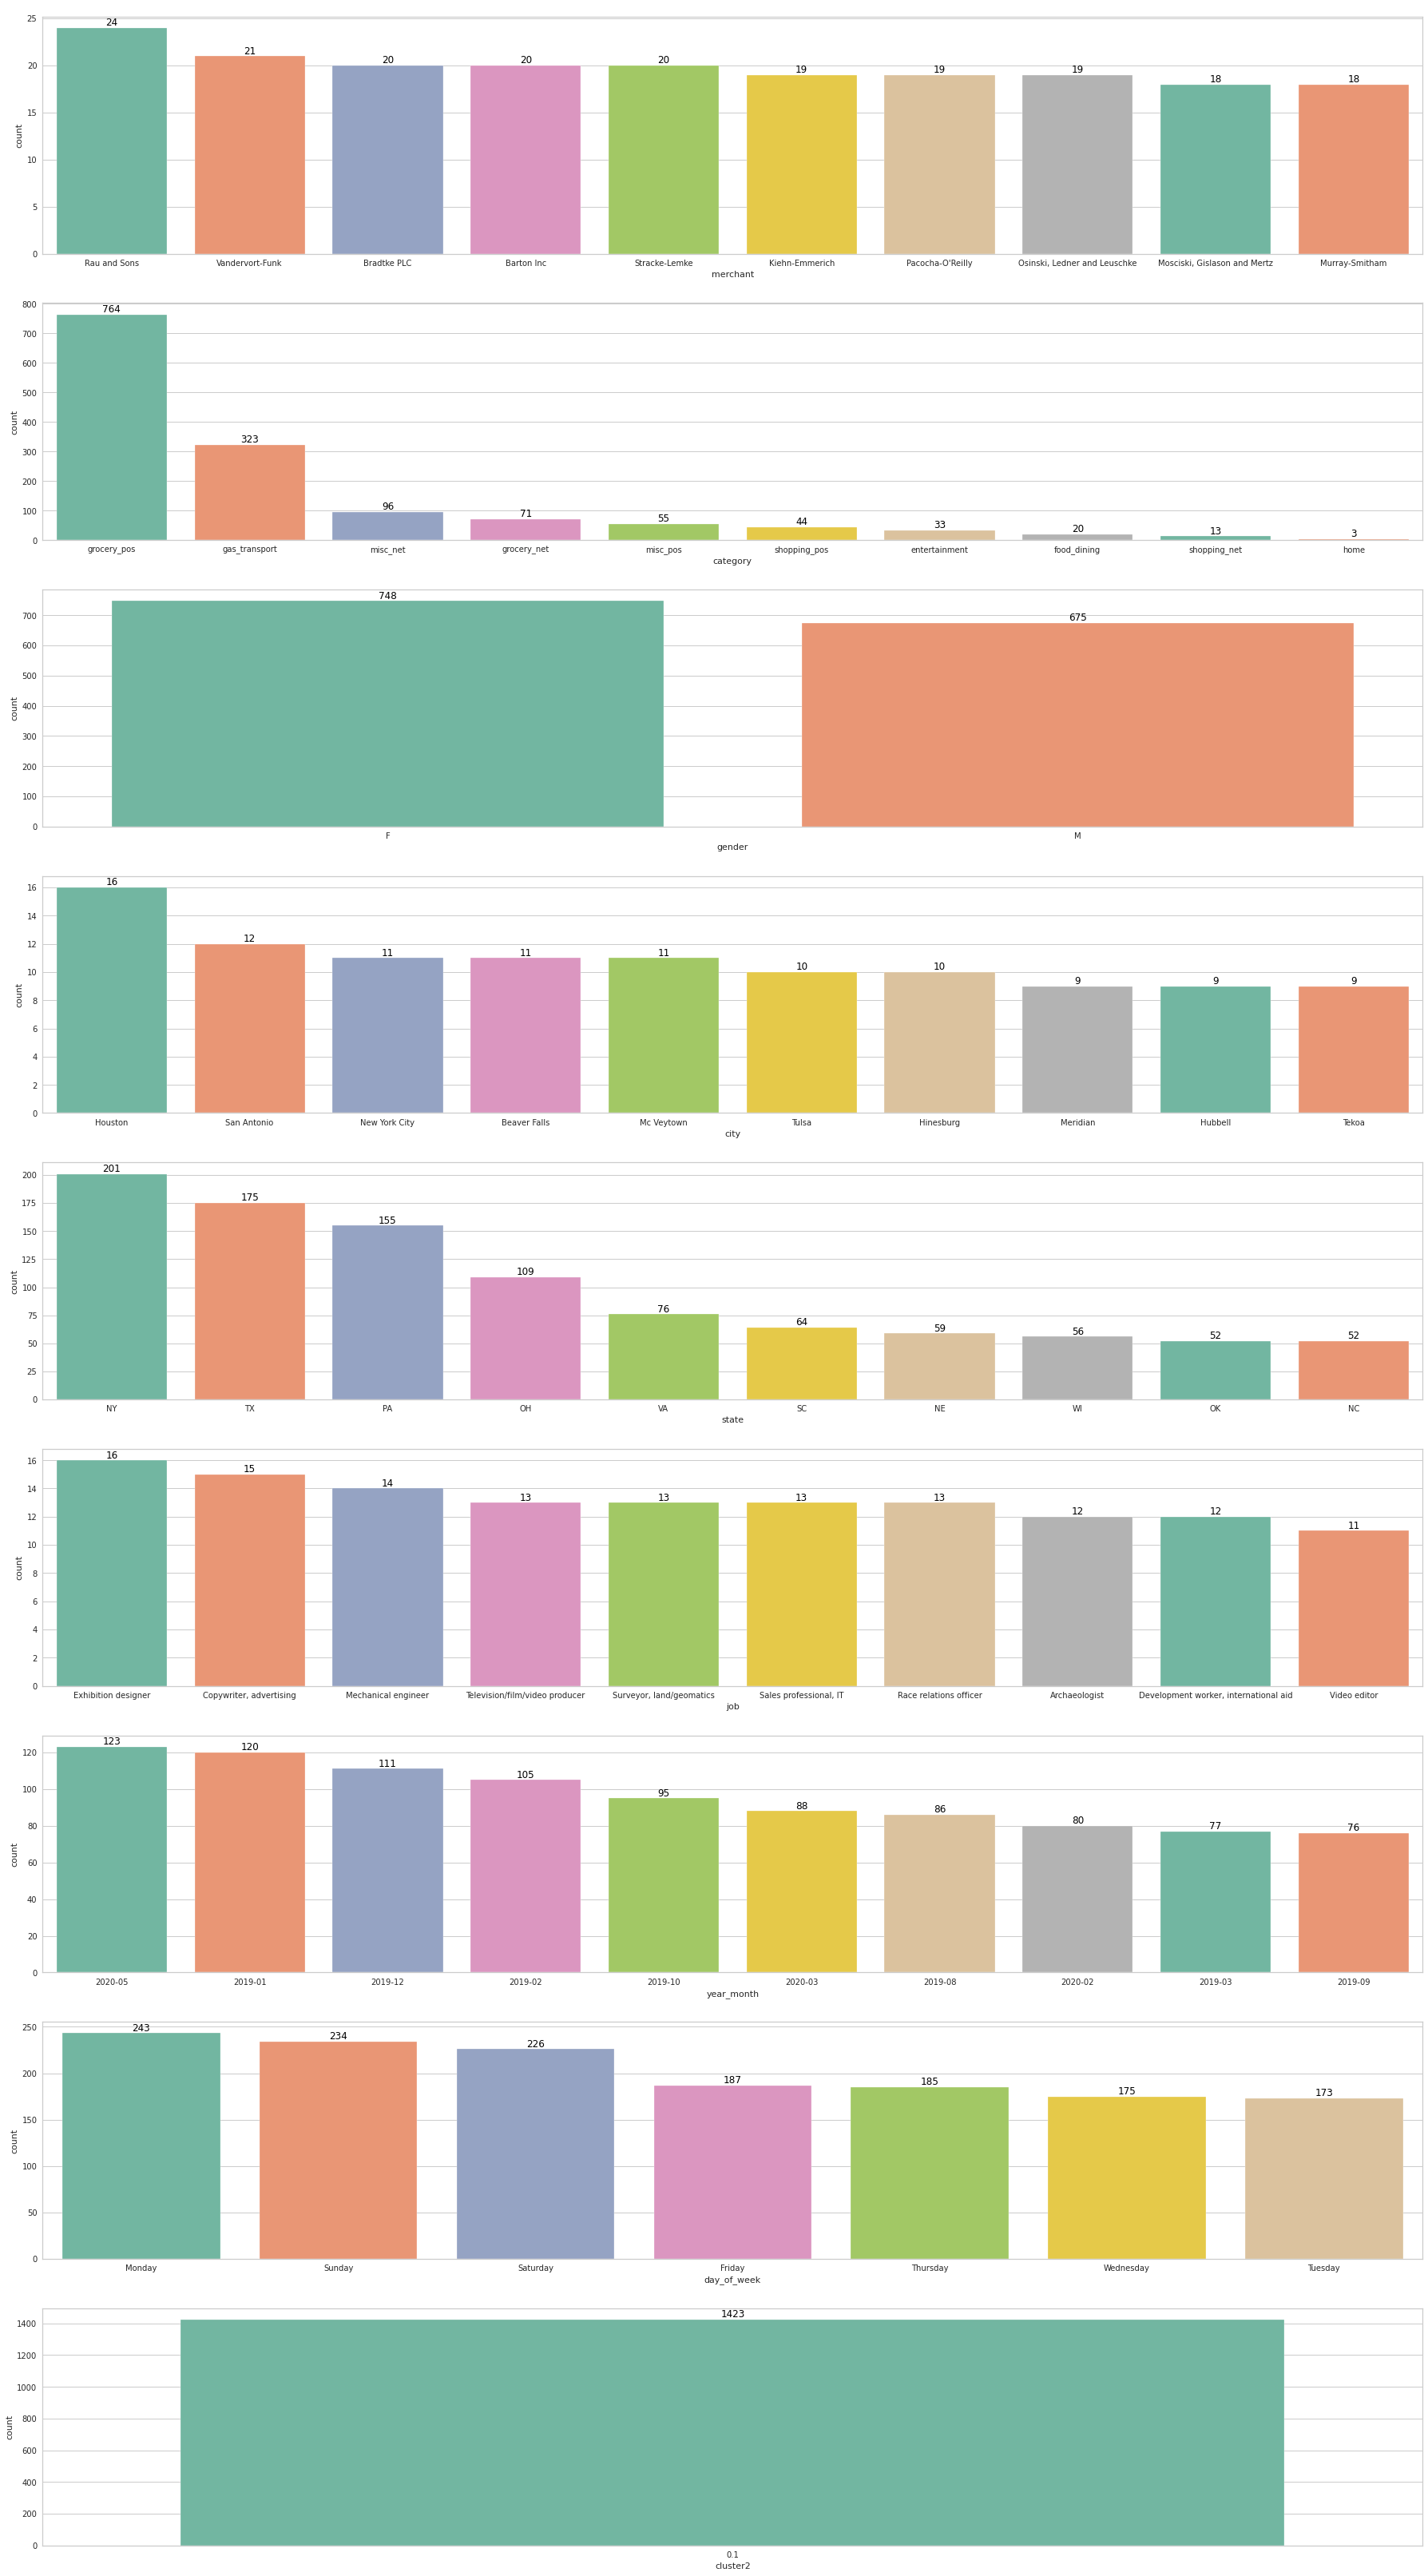

In [89]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data2.select_dtypes(include='object').columns ]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] == '0.1']  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

Nhóm giao dịch gian lận (Cluster 1) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại "grocery_pos".
- **Giới tính:** Nữ chiếm tỉ lệ cao hơn Nam trong giao dịch gian lận, với 874 giao dịch so với 688 giao dịch của Nam.
- **Thành phố gian lận cao nhất:** Houston được xác định là thành phố với số lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:** NY, TX, và PA là 3 bang có số lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:** Sales professional IT, Exhibition designer, Surveyor land/geomatics.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào các năm như 2020 - 5, 2019 - 01, 2019 - 12.
- **Ngày gian lận:** Phân phối tập trung vào Chủ Nhật, Thứ 2, và Thứ 7.

### Số liệu chi tiết
- **Amt (Số tiền):**
  - Median: 305.80
  - Q1: 20.09
  - Q3: 361.43
  - Min: 5.97
  - Max: 1289.89
  - Upper Threshold: 873.45
  - Avg: 347.888
- **City_pop (Dân số thành phố):**
  - Median: 3212.50
  - Q1: 795.00
  - Q3: 19408.00
  - Min: 23.00
  - Max: 2906700.00
  - Upper Threshold: 47327.50
  - Avg: 122236.682
- **Trans_hour (Giờ giao dịch):**
  - Median: 2.00
  - Q1: 1.00
  - Q3: 3.00
  - Min: 0.00
  - Max: 13.00
  - Upper Threshold: 6.00
- **Age (Tuổi):**
  - Median: 44.00
  - Q1: 30.00
  - Q3: 57.00
  - Min: 14.00
  - Max: 93.00
  - Upper Threshold: 97.50
  - Avg: 45.303
- **Distance (Khoảng cách giữa customer và merchant):**
  - Median: 77.38 km
  - Q1: 54.95 km
  - Q3: 96.13 km
  - Min: 1.93 km
  - Max: 143.54 km
  - Upper Threshold: 157.91 km
  - Avg: 75.121 km

### Nhận xét
- Số tiền giao dịch gian lận thường tập trung ở mức thấp với phân bố rời rạc ở mức cao, Trung bình giao dịch 347.888.
- Dân số thành phố (city_pop) thường ở mức trung bình đến cao. Trung bình dân số thành phố cao hơn so với các nhóm khác 122236.682. 
- Giờ giao dịch chủ yếu từ nửa đêm đến sáng sớm.
- Phần lớn người thực hiện giao dịch gian lận có độ tuổi từ 20 đến 50, với đỉnh cao ở khoảng 30 tuổi. Trung bình 45.303, giao dịch chủ yếu từ những người trung niên.
- Khoảng cách giữa khách hàng và người bán hàng tương đối, chủ yếu từ 40 đến 110 km. Trung bình khoảng 75.121 km.


### Cluster 1.2 ( Outlier )

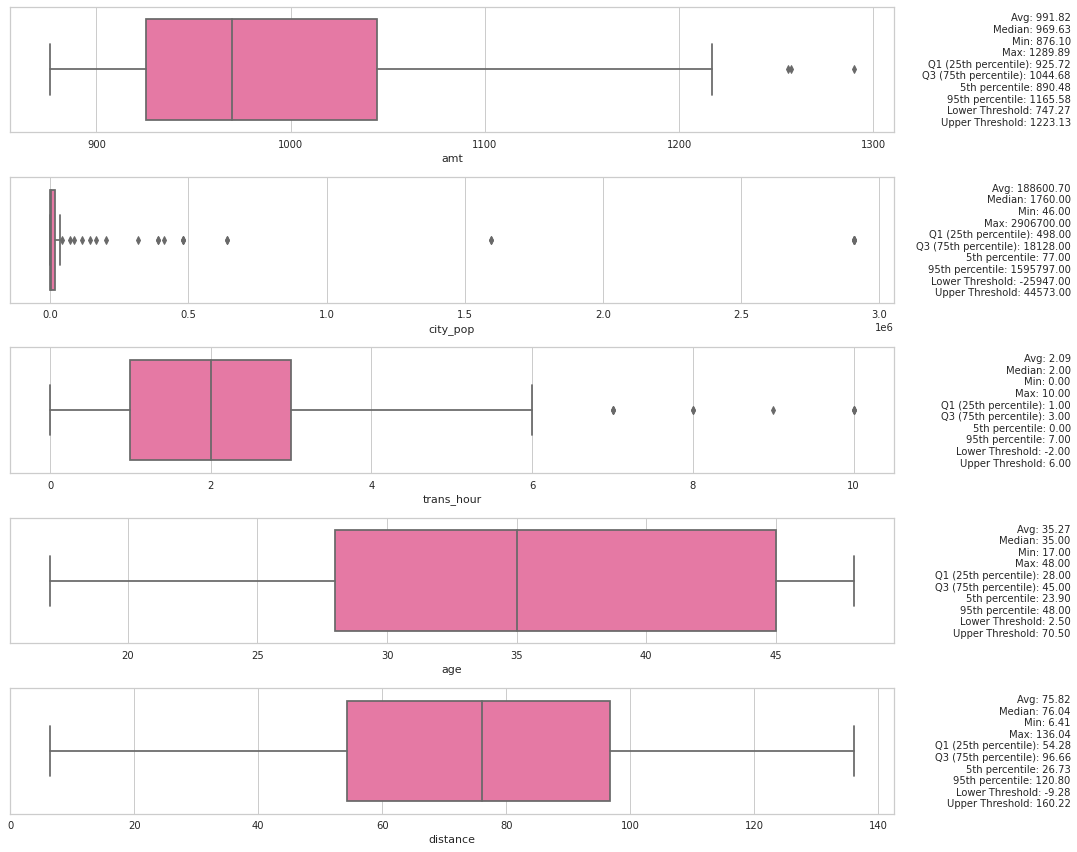

In [90]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data2.select_dtypes(include='number').columns  if col not in ['cluster', 'cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] ==  '0.2']  # Lọc dữ liệu cho cụm hiện tại
plot_boxplot2(cluster_data, numerical_columns, 'RdPu')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [91]:
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

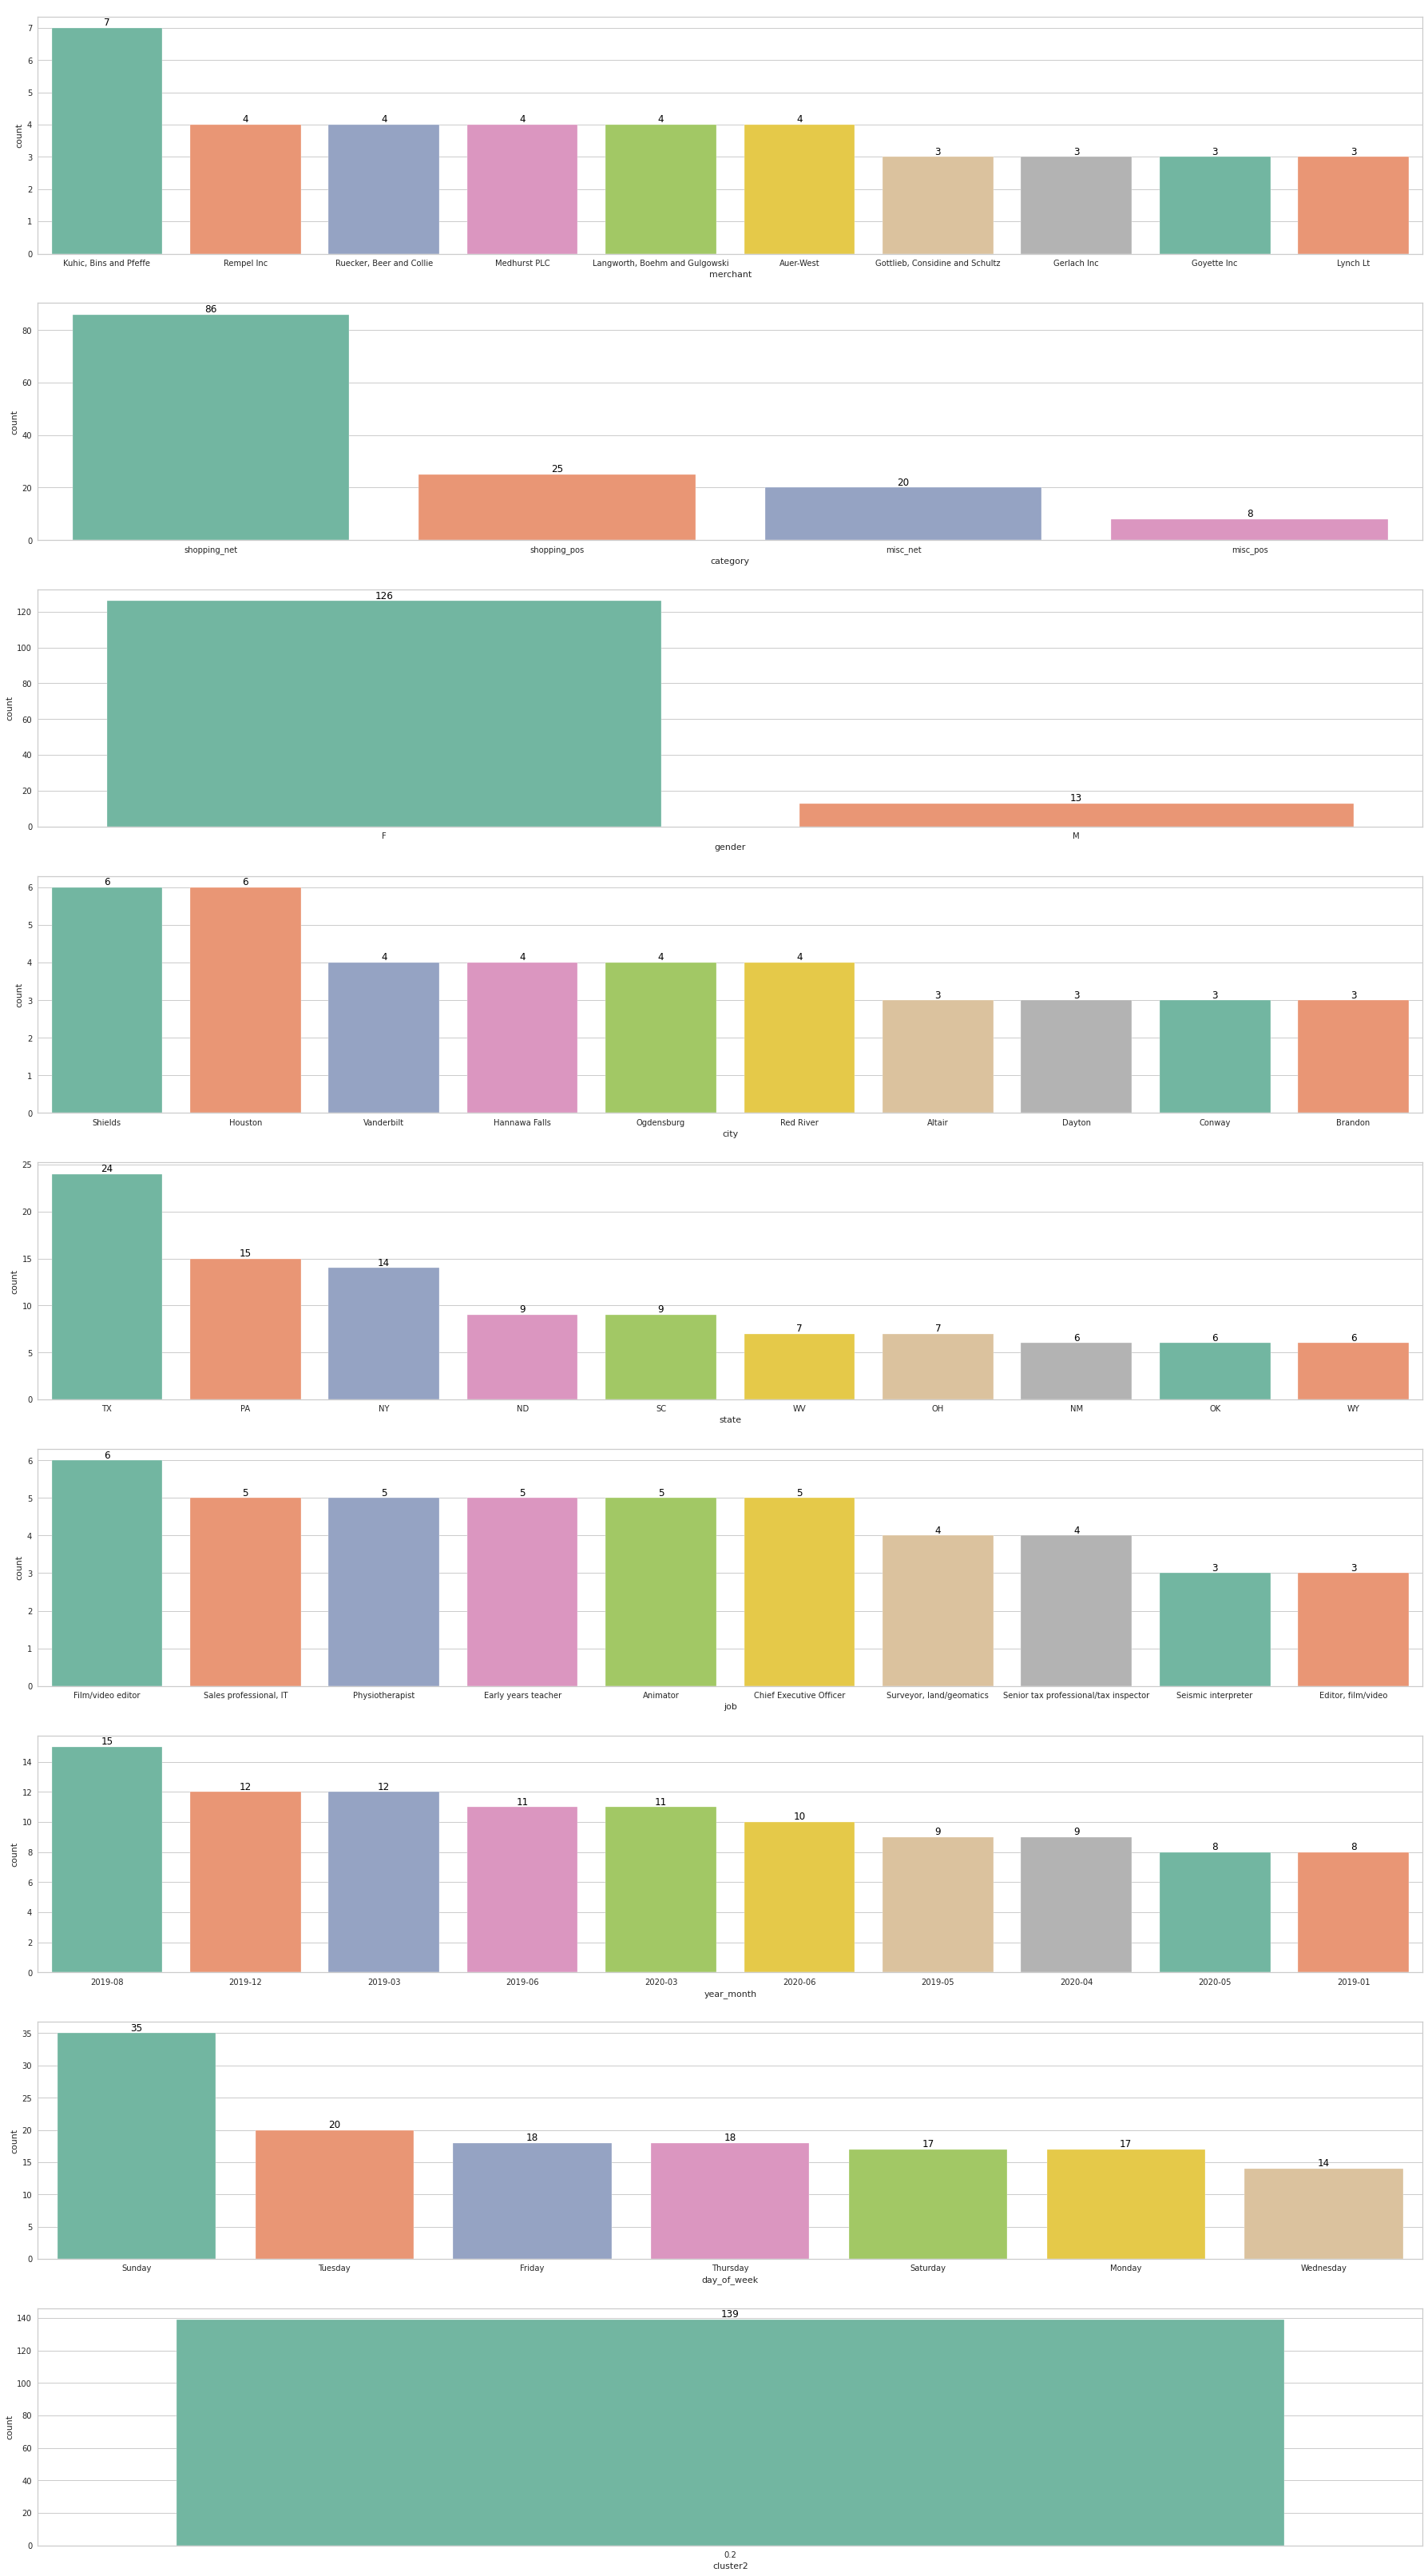

In [92]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data2.select_dtypes(include='object').columns ]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] == '0.2']  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

## Cluster 2

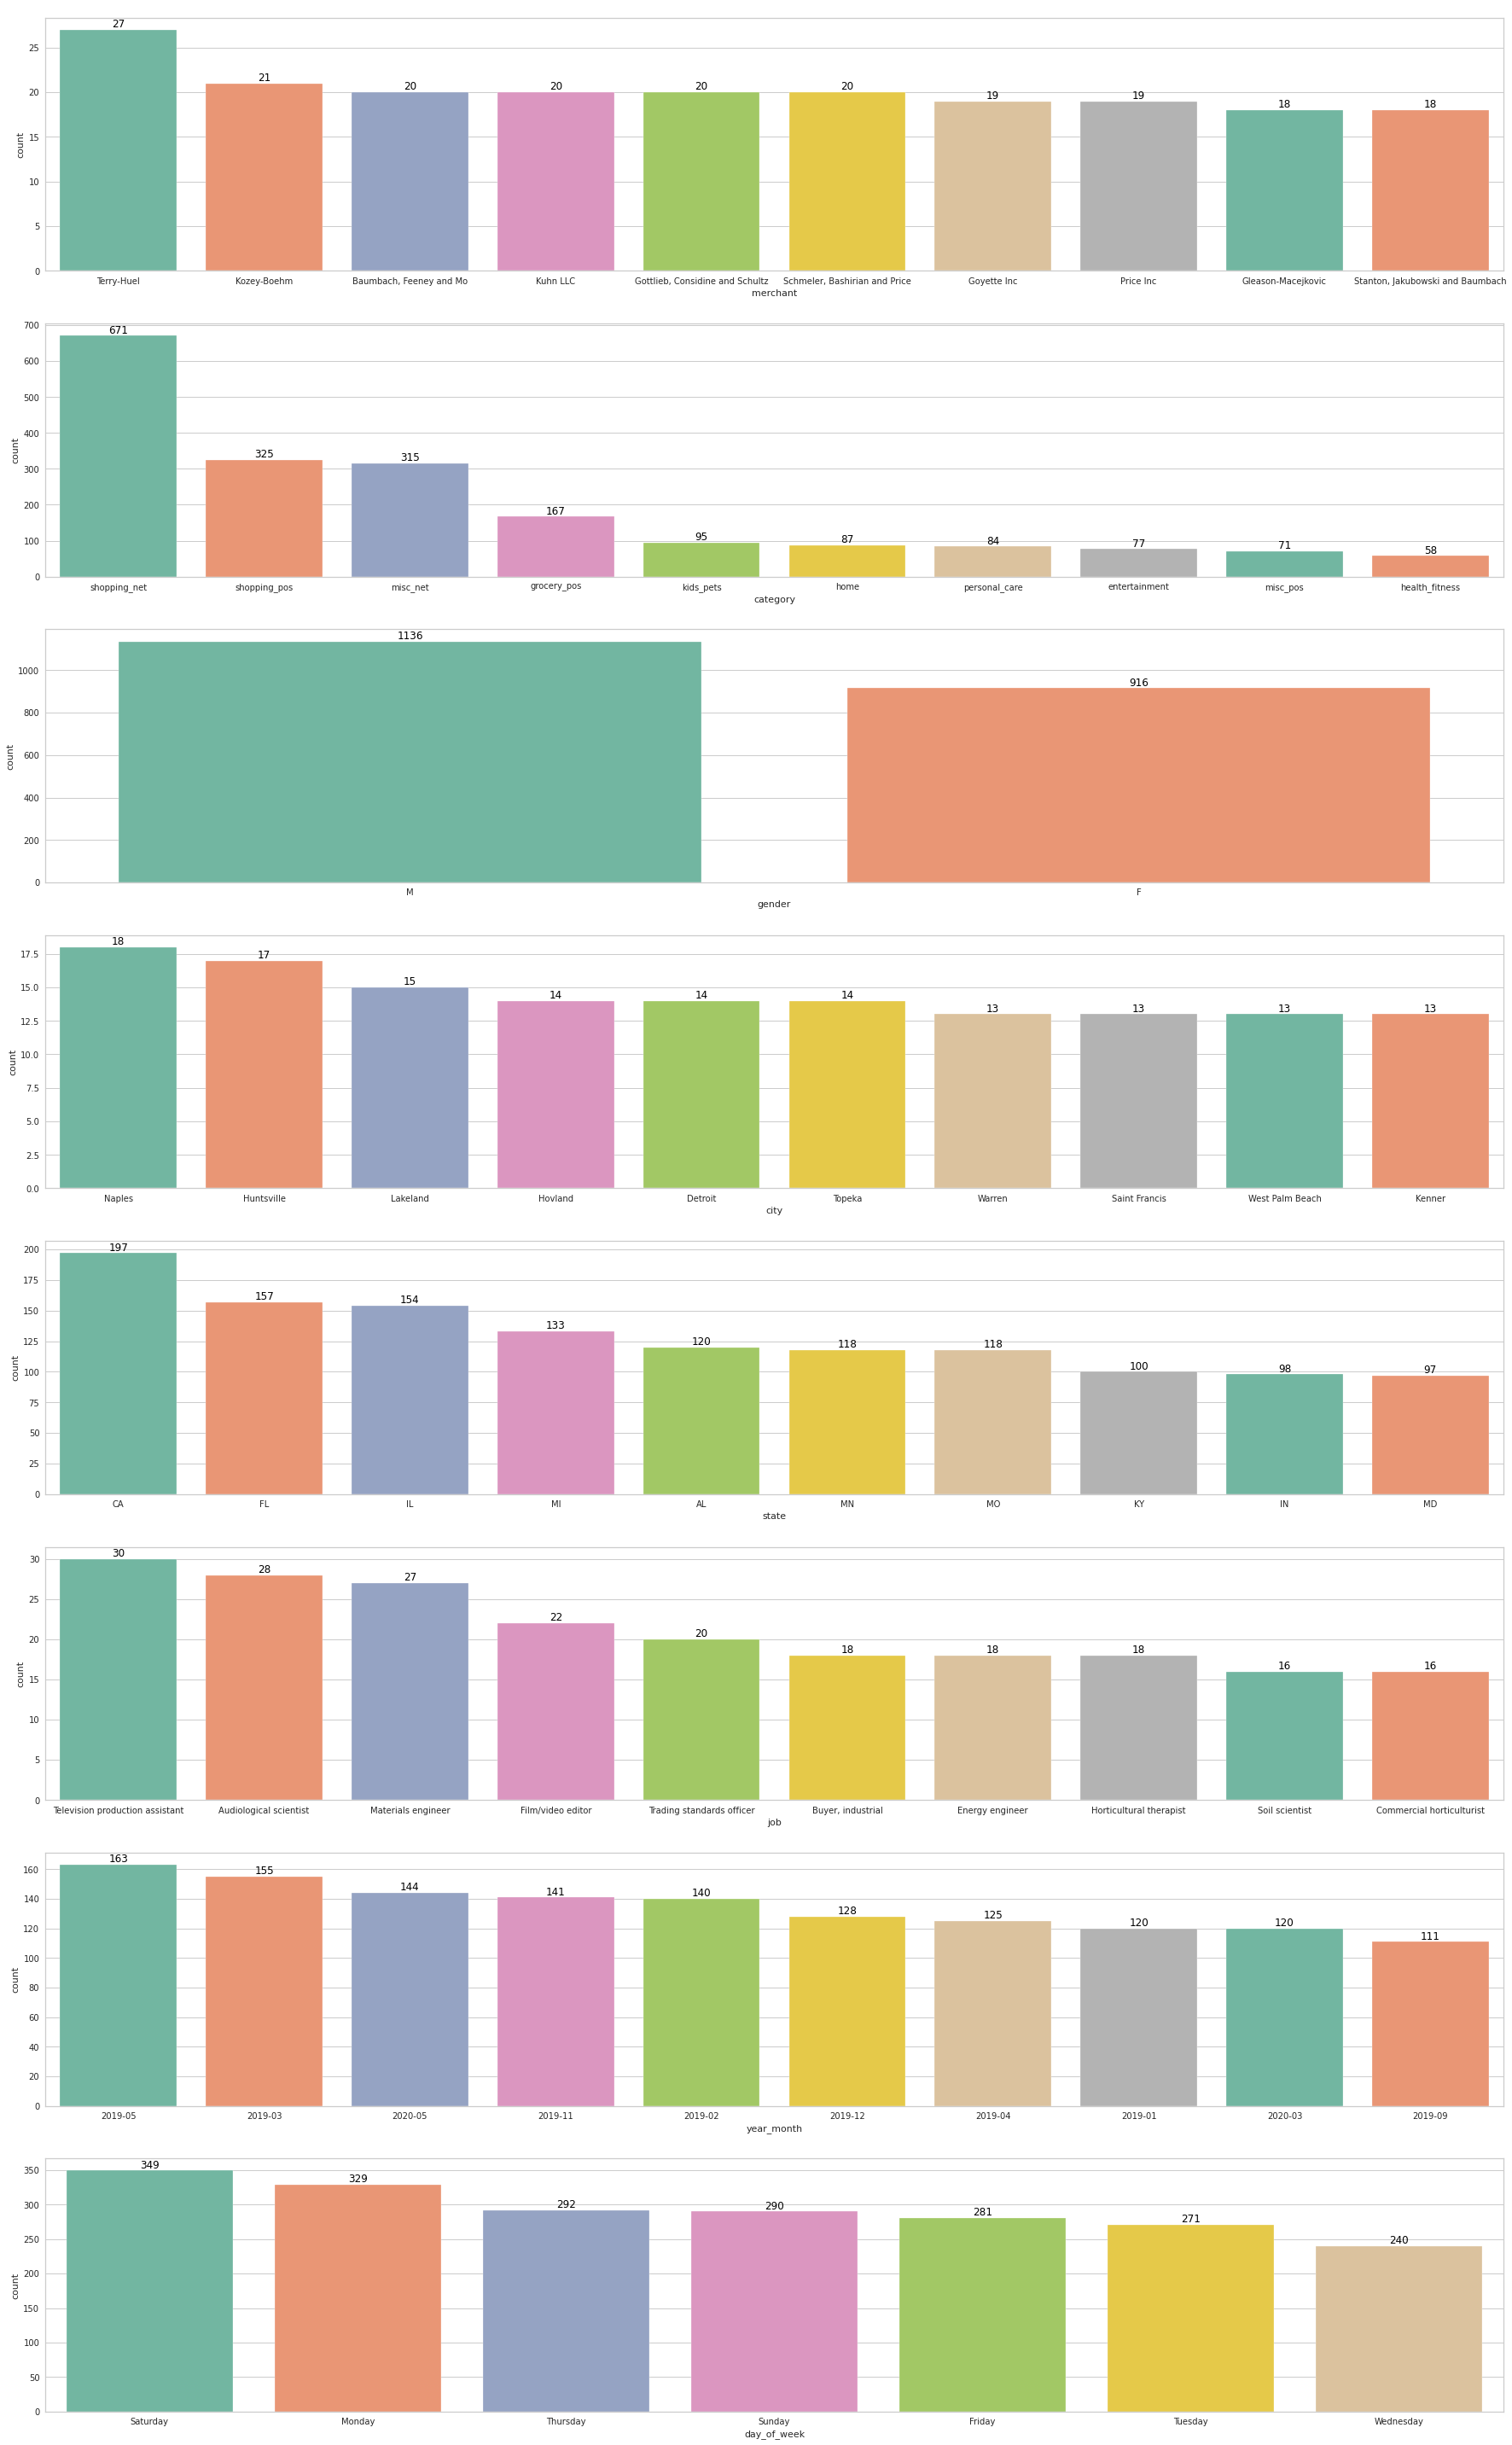

In [93]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data.select_dtypes(include='object').columns ]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] == 1]  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

In [94]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data.select_dtypes(include='number').columns  if col not in ['cluster']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] ==  1]  # Lọc dữ liệu cho cụm hiện tại
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

Nhóm giao dịch gian lận (Cluster 2) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại " shopping_net".
- **Giới tính:** Nam chiếm tỉ lệ cao hơn Nữ trong giao dịch gian lận, với 1136 giao dịch so với 916 giao dịch của Nữ.
- **Thành phố gian lận cao nhất:** Naples được xác định là thành phố với số lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:**CA, FL và IL là 3 bang có số lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:**Television production assistant, Audiological scientist, Materials engineer.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào các năm như 2019 - 5, 2019 - 03, 2020 - 05.
- **Ngày gian lận:** Phân phối tập trung vào Thứ 7, Thứ 2 và Thứ 5

### Số liệu chi tiết
- **Amt (Số tiền):**
  - Median: 807.53
  - Q1: 286.23
  - Q3: 963.00
  - Min: 1.06
  - Max: 1376.04
  - Upper Threshold: 1978.16
  - Avg: 651.490
- **City_pop (Dân số thành phố):**
  - Median: 2566.00
  - Q1: 660.50
  - Q3: 31515.00
  - Min: 37.00
  - Max: 2383912.00
  - Upper Threshold: 77796.75
  - Avg: 82644.093
- **Trans_hour (Giờ giao dịch):**
  - Median: 22.00
  - Q1: 22.00
  - Q3: 23.00
  - Min: 11.00
  - Max: 23.00
  - Lower Threshold: 20.50
- **Age (Tuổi):**
  - Median: 51.00
  - Q1: 35.00
  - Q3: 62.00
  - Min: 14.00
  - Max: 93.00
  - Upper Threshold: 102.50
  - Avg: 50.401
- **Distance (Khoảng cách giữa customer và merchant):**
  - Median: 76.70 km
  - Q1: 55.37 km
  - Q3: 98.83 km
  - Min: 3.60 km
  - Max: 140.03 km
  - Upper Threshold: 164.00 km
  - Avg: 75.943 km

### Nhận xét
- Số tiền giao dịch gian lận thường tập trung ở mức thấp và cao với phân bố tập trung ở giao dịch nhỏ và giao dịch lớn rời rạc dần ở mức trung. Trung bình giao dịch 651.490, số tiền trung bình cao hơn rất nhiều so với các nhóm khác.
- Dân số thành phố (city_pop) thường ở mức trung bình đến thấp.
- Giờ giao dịch chủ yếu nửa đêm từ 22 giờ trở đi. Giao dịch chủ yếu diễn ra vào buổi tối đến đêm.
- Phần lớn người thực hiện giao dịch gian lận có độ tuổi từ 20 đến 70, với đỉnh cao ở khoảng 50 - 60 tuổi. Giao dịch chủ yếu từ những người trung niên đến cao tuổi.
- Khoảng cách giữa khách hàng và người bán hàng tương đối, chủ yếu từ 50 đến 110 km. Không có sự khác biệt lớn.



## Cluster 3

### Cluster 3.1 ( ~ Outlier )

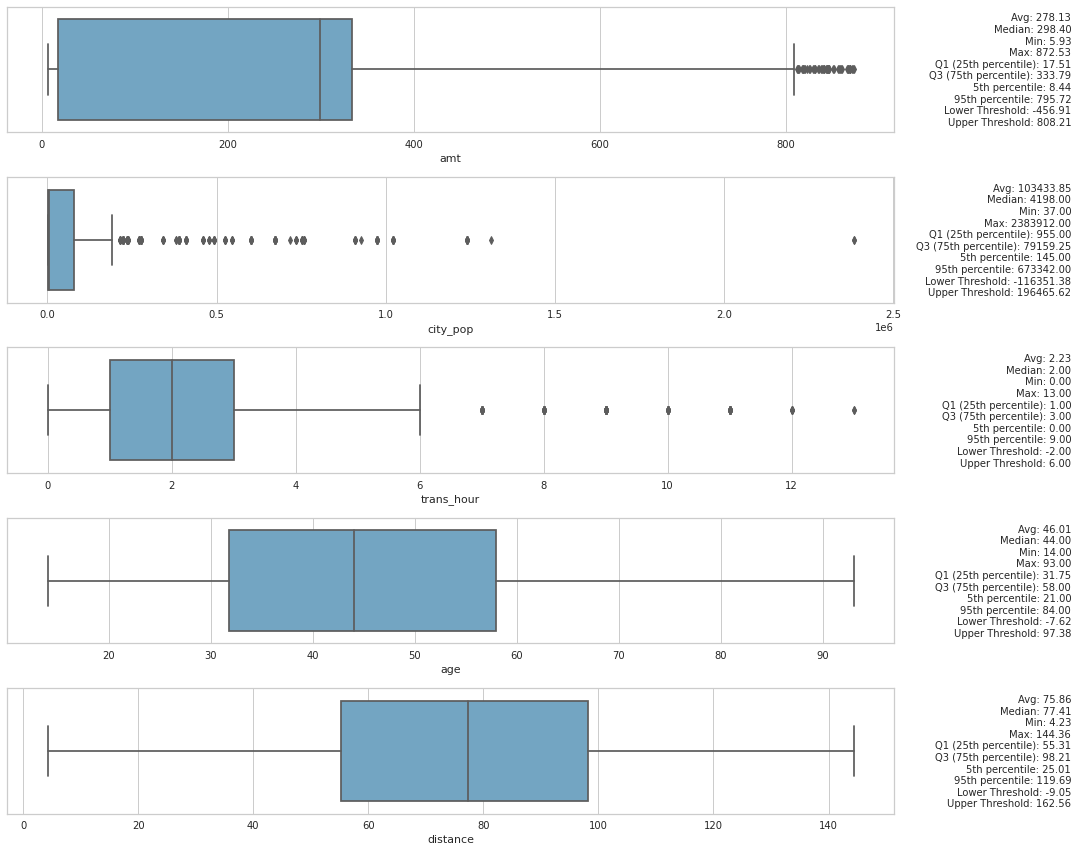

In [95]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data2.select_dtypes(include='number').columns  if col not in ['cluster', 'cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] ==  '2.1']  # Lọc dữ liệu cho cụm hiện tại
plot_boxplot2(cluster_data, numerical_columns, 'PuBuGn')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [96]:
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

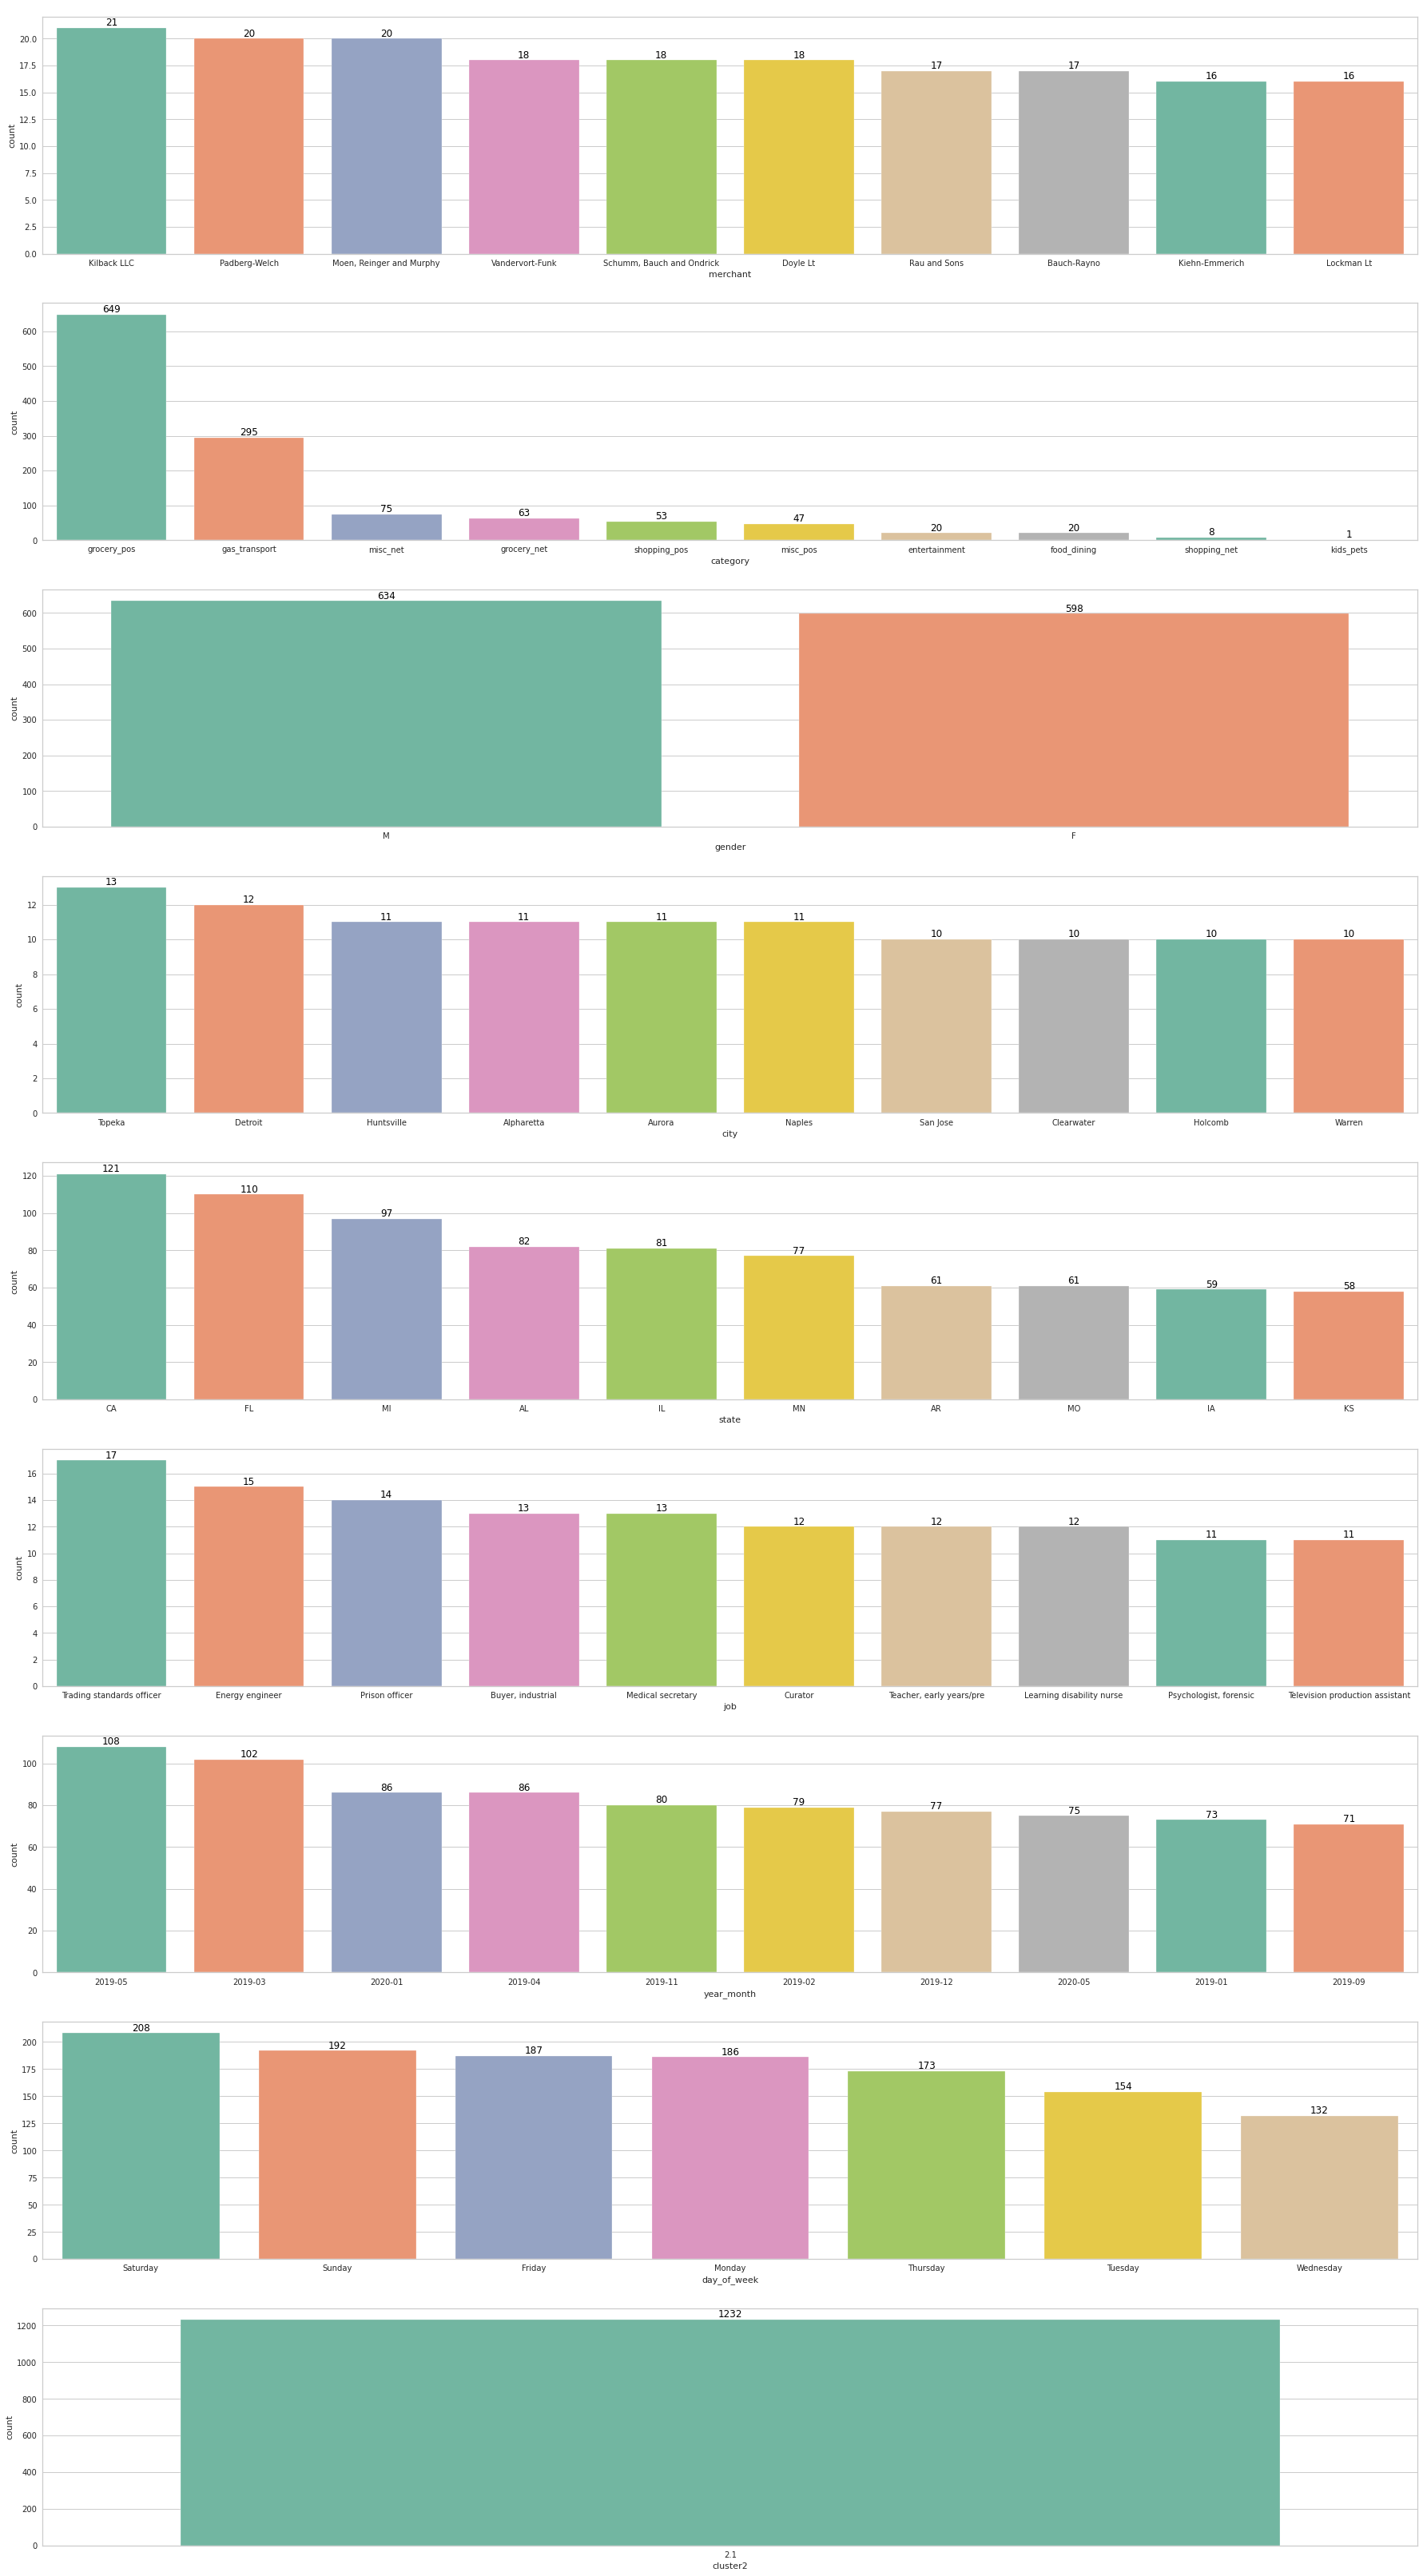

In [97]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data2.select_dtypes(include='object').columns ]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] == '2.1']  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

Nhóm giao dịch gian lận (Cluster 3) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại " grocery_pos".
- **Giới tính:** Nữ chiếm tỉ lệ cao hơn Nam trong giao dịch gian lận, với 712 giao dịch so với 645 giao dịch của Nam.
- **Thành phố gian lận cao nhất:** Walnut Ridge và Topeka được xác định là thành phố với số lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:**CA, FL và MI là 3 bang có số lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:**Trading standards officer, Environmental consultant, Medical secretary.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào các năm như 2019 - 5, 2019 - 03, 2019 - 12.
- **Ngày gian lận:** Phân phối tập trung vào Thứ 7, Chủ Nhật và Thứ 2.

### Số liệu chi tiết
- **Amt (Số tiền):**
  - Median: 303.92
  - Q1: 19.43
  - Q3: 360.92
  - Min: 5.93
  - Max: 1210.91
  - Upper Threshold: 873.15
  - Avg: 343.513
- **City_pop (Dân số thành phố):**
  - Median: 4198.00
  - Q1: 969.00
  - Q3: 79613.00
  - Min: 37.00
  - Max: 2383912.00
  - Upper Threshold: 197579.00
  - Avg: 104552.974
- **Trans_hour (Giờ giao dịch):**
  - Median: 2.00
  - Q1: 1.00
  - Q3: 3.00
  - Min: 0.00
  - Max: 13.00
  - Upper Threshold: 6.00
- **Age (Tuổi):**
  - Median: 43.00
  - Q1: 31.00
  - Q3: 56.00
  - Min: 14.00
  - Max: 93.00
  - Upper Threshold: 93.50
  - Avg: 45.113
- **Distance (Khoảng cách giữa customer và merchant):**
  - Median: 77.55 Km
  - Q1: 55.33 Km
  - Q3: 98.29 Km
  - Min: 4.23 Km
  - Max: 144.36 Km
  - Upper Threshold: 162.72 Km
  - Avg: 76.010 Km

### Nhận xét
- Số tiền giao dịch gian lận thường tập trung ở mức thấp với phân bố tập trung ở giao dịch nhỏ và giao dịch lớn rời rạc dần ở mức trung và cao. Trung bình giao dịch 343.513, ở mức trung bình so với các nhóm khác.
- Dân số thành phố (city_pop) thường ở mức trung bình. Trung bình dân số thành phố trung bình so với các nhóm khác.
- Giờ giao dịch chủ yếu nửa đêm từ 0 giờ trở đi đến 3 giờ. Giao dịch chủ yếu diễn ra vào nửa đêm.
- Phần lớn người thực hiện giao dịch gian lận có độ tuổi từ 20 đến 60, với đỉnh cao ở khoảng 25 - 45 tuổi. Giao dịch chủ yếu từ những người trung niên đến cao tuổi. Có sự dịch chuyển về người trẻ hơn. Tuy vậy cũng có lượng nhỏ người lớn tuổi.
- Khoảng cách giữa khách hàng và người bán hàng tương đối, chủ yếu từ 40 đến 120 km. Không có sự khác biệt lớn. Tập trung nhiều khoảng 80 km


### Cluster 3.2 ( Outlier )

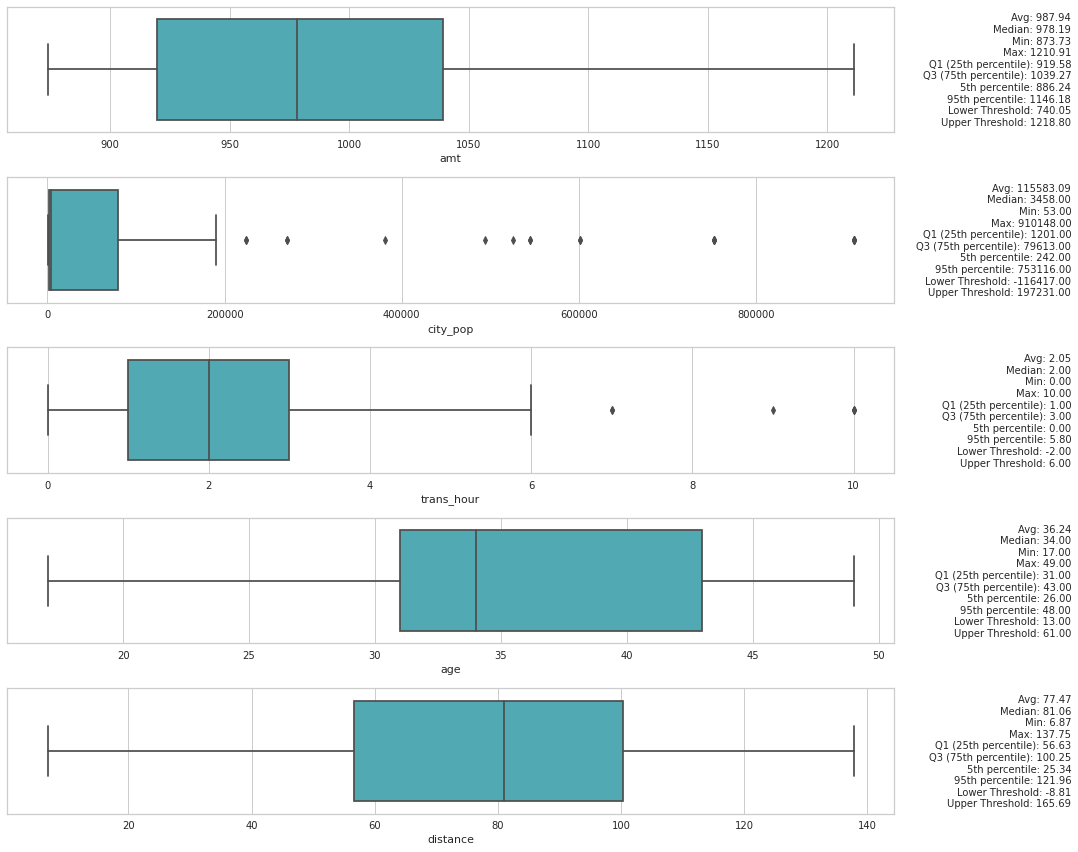

In [98]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data2.select_dtypes(include='number').columns  if col not in ['cluster', 'cluster2']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] ==  '2.2']  # Lọc dữ liệu cho cụm hiện tại
plot_boxplot2(cluster_data, numerical_columns, 'YlGnBu')  # Vẽ biểu đồ boxplot cho các cột số trong cụm

In [99]:
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

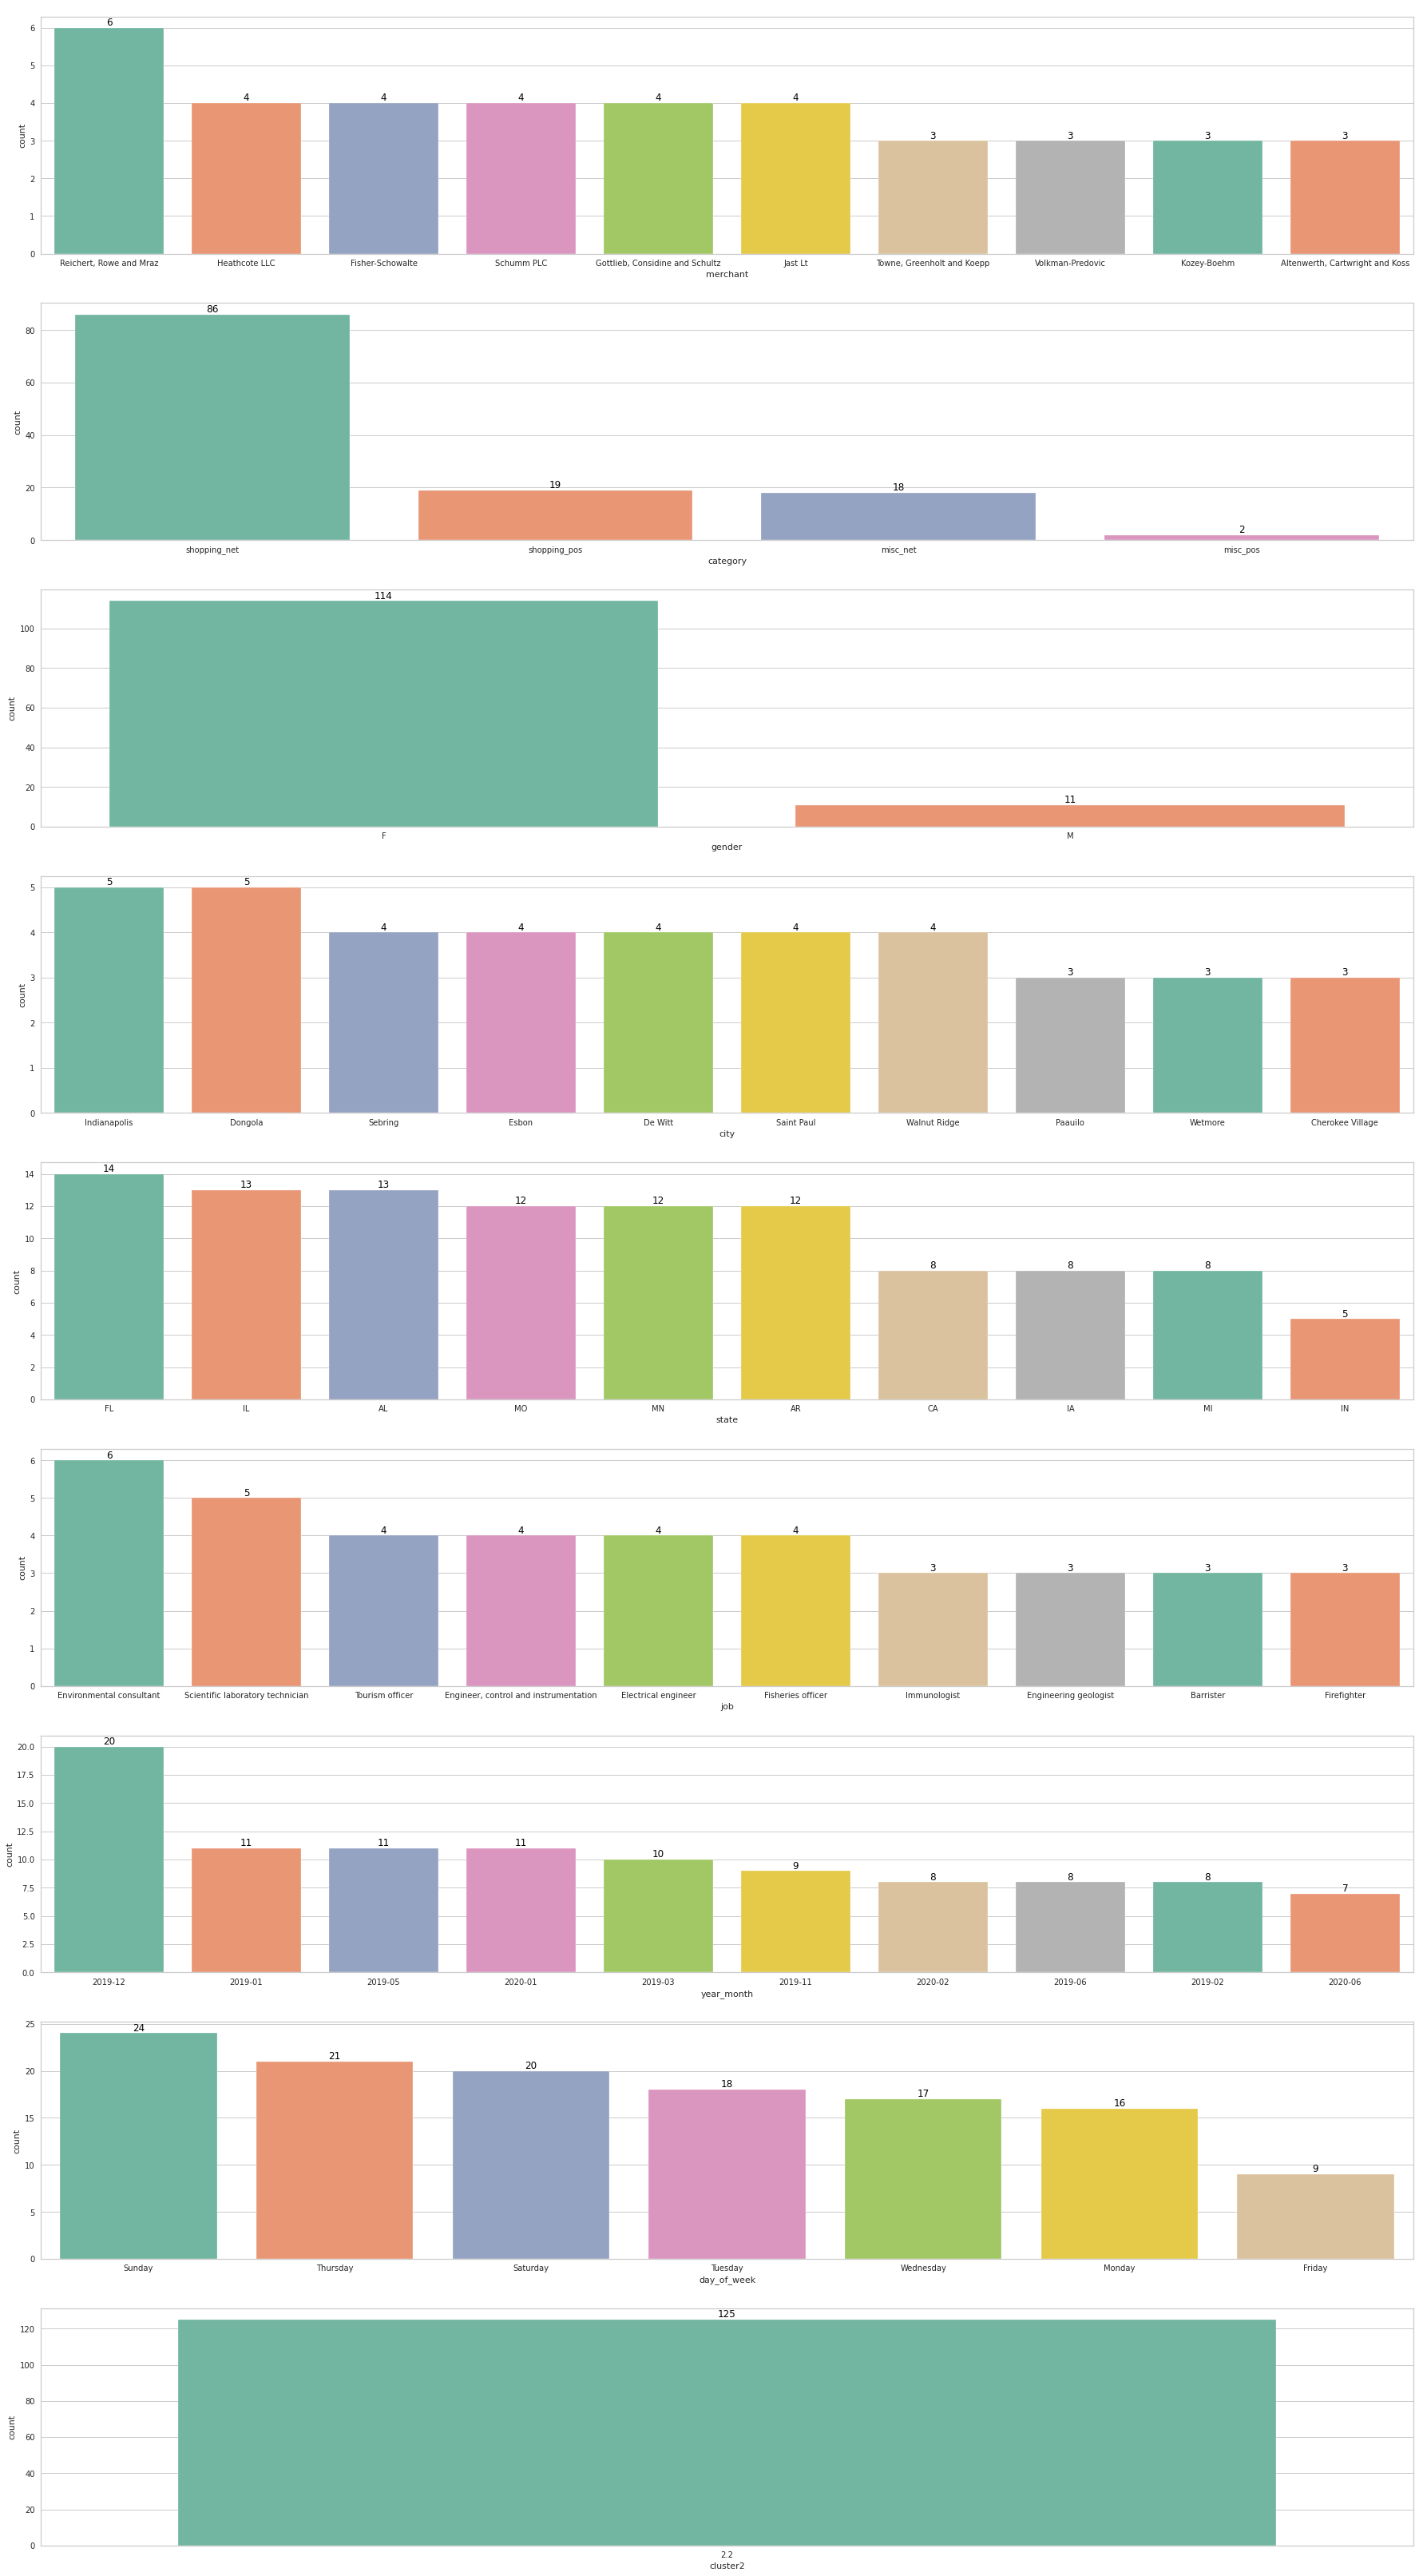

In [100]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data2.select_dtypes(include='object').columns ]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data2['cluster2'].unique())

cluster_data = merged_data2[merged_data2['cluster2'] == '2.2']  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

## Cluster 4

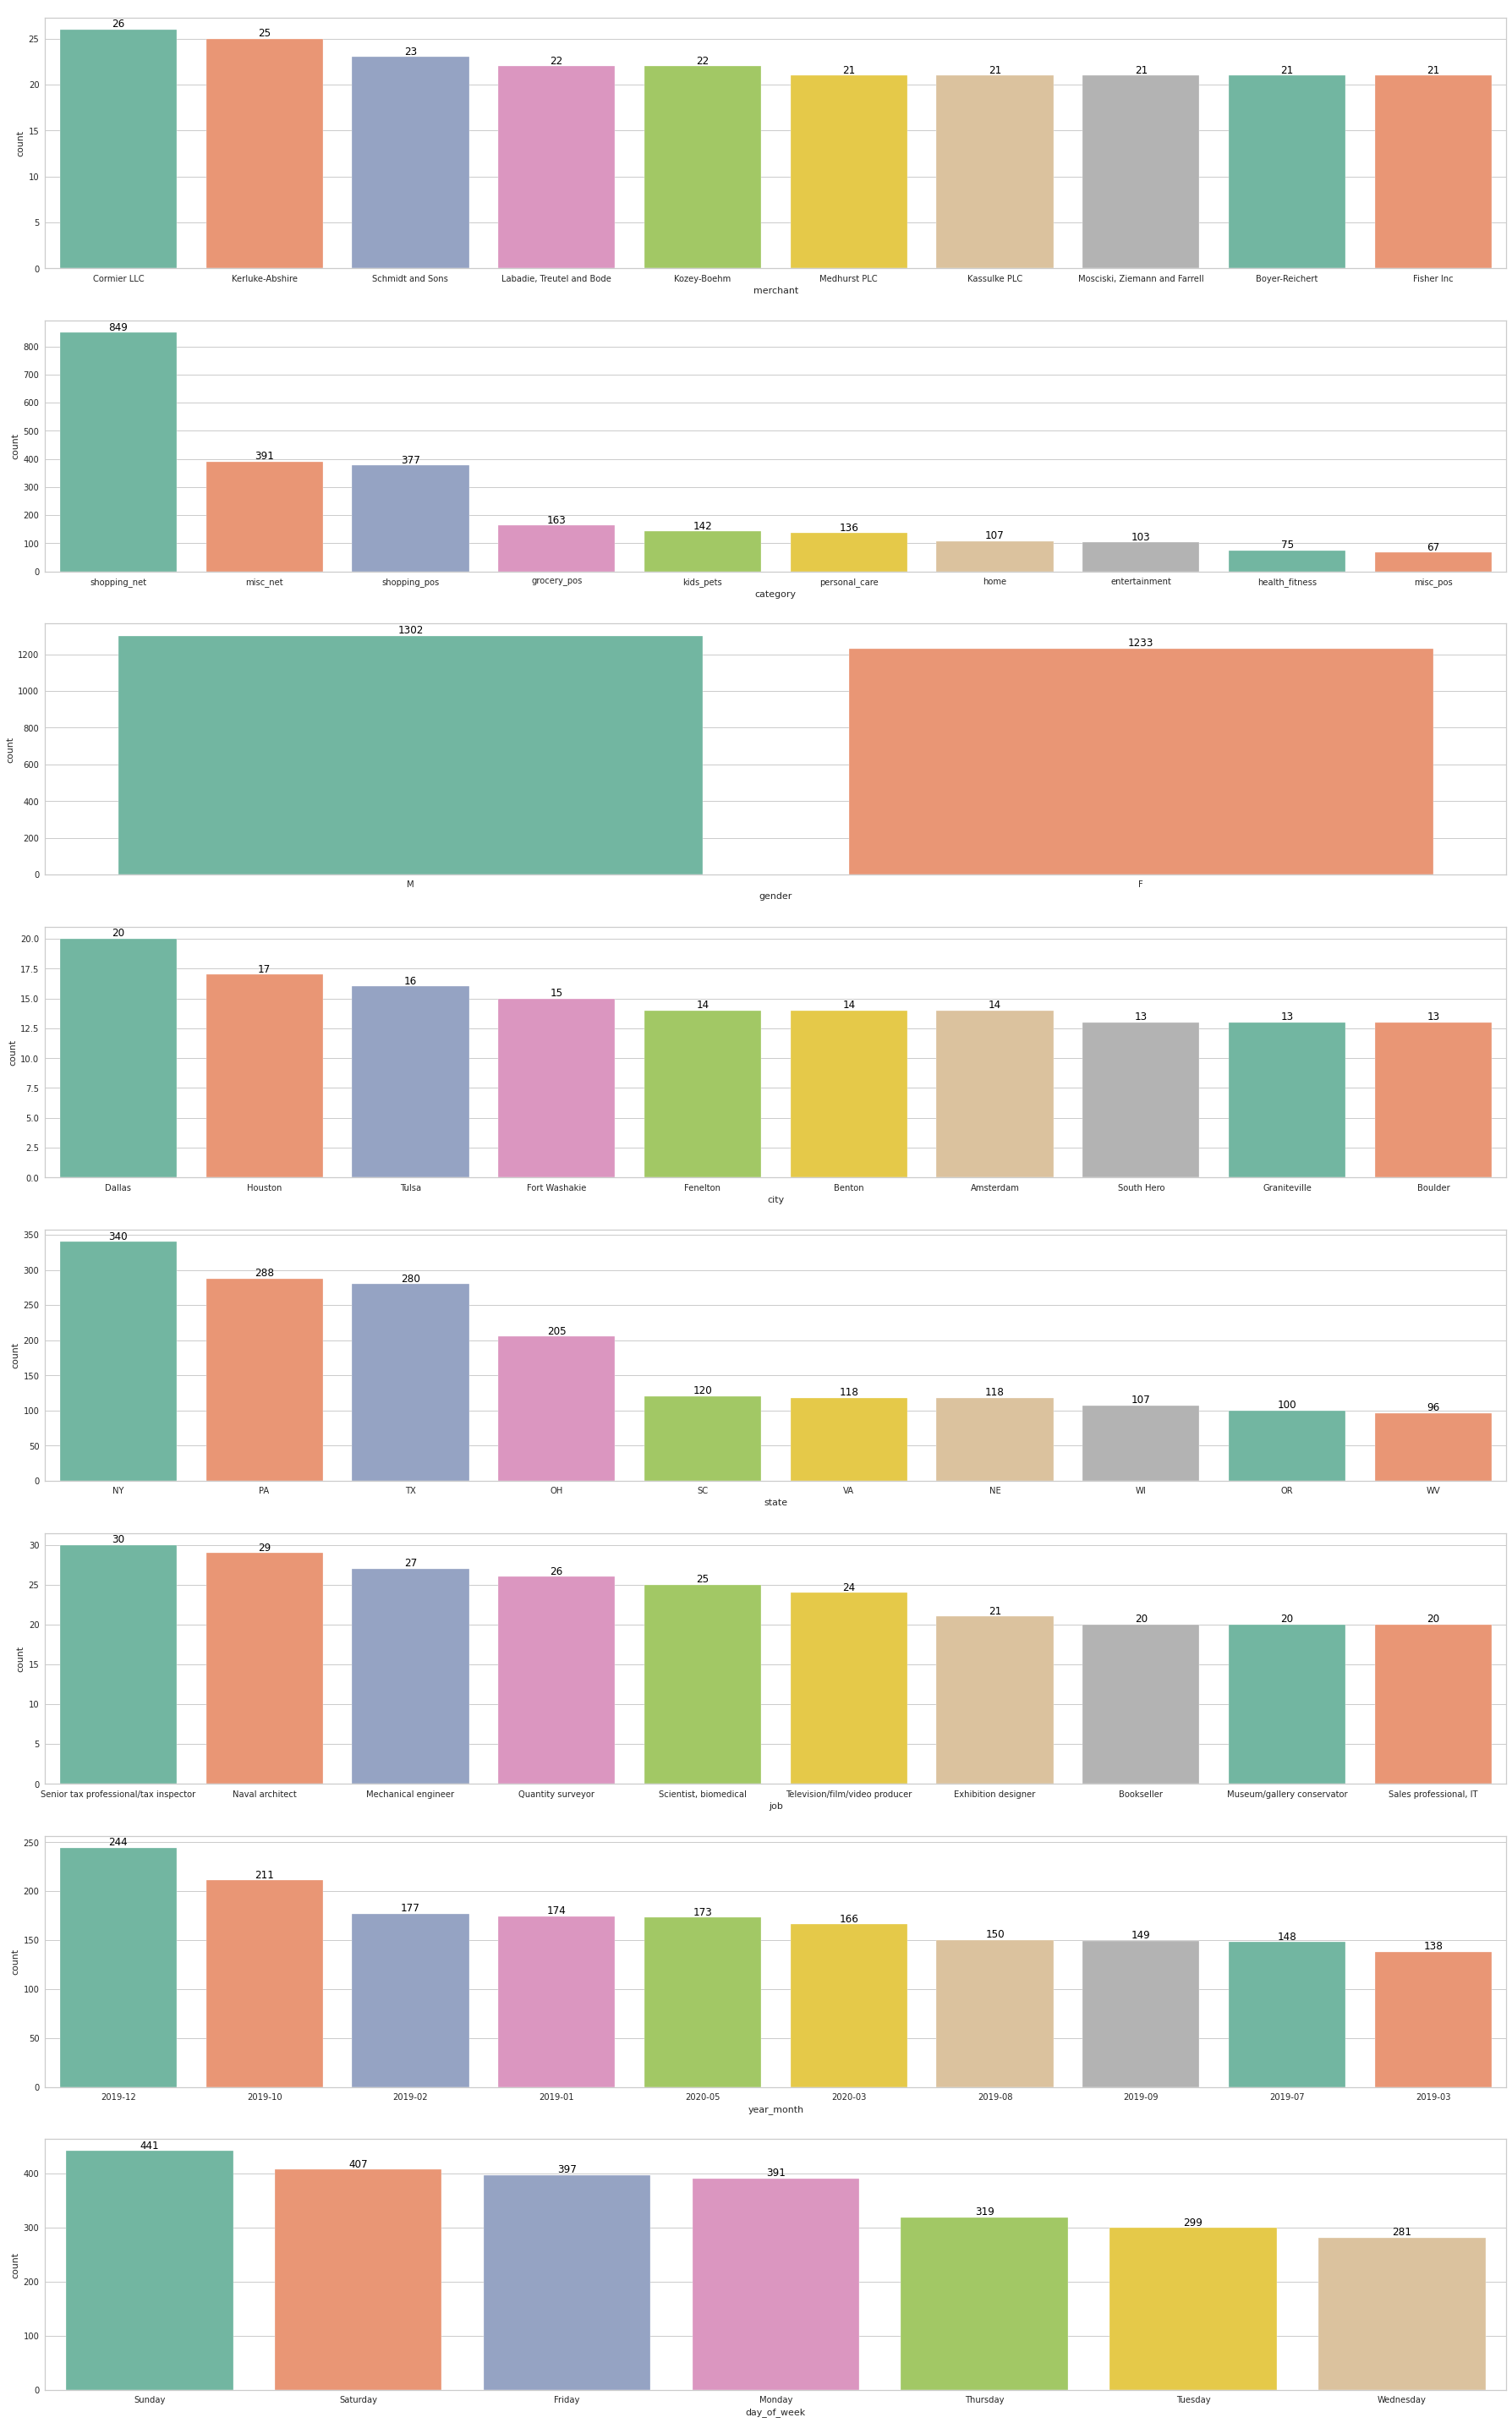

In [101]:
# Tạo danh sách 'categorical_features' chứa tất cả các cột phân loại trong DataFrame 'df'
categorical_features = [feature for feature in merged_data.select_dtypes(include='object').columns ]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] == 3]  # Lọc dữ liệu cho cụm hiện tại
# Sử dụng hàm với DataFrame df và danh sách các features cần vẽ, chỉ lấy top 10 giá trị
plot_categorical_features2(cluster_data, categorical_features, top_n=10)

In [102]:
# Tìm tất cả các cột số trong DataFrame 'clusters'
numerical_columns = [col for col in merged_data.select_dtypes(include='number').columns  if col not in ['cluster']]

# Lấy giá trị của cụm đã phân loại và sắp xếp chúng
cluster_values = sorted(merged_data['cluster'].unique())

cluster_data = merged_data[merged_data['cluster'] ==  3]  # Lọc dữ liệu cho cụm hiện tại
plot_numerical_features_plotly(cluster_data, numerical_columns)  # Vẽ biểu đồ boxplot cho các cột số trong cụm

Nhóm giao dịch gian lận (Cluster 4) có một số đặc điểm quan trọng:

### Tổng quan
- **Category Merchant:** Đa số giao dịch gian lận là ở loại " shopping_net".
- **Giới tính:** Nam chiếm tỉ lệ cao hơn Nữ trong giao dịch gian lận, với 1302 giao dịch so với 1233 giao dịch của Nữ.
- **Thành phố gian lận cao nhất:** Dallas được xác định là thành phố với số lượng giao dịch gian lận nhiều nhất.
- **Các bang có giao dịch gian lận nhiều nhất:**NY, PA và TX là 3 bang có số lượng giao dịch gian lận cao nhất.
- **Các nghề nghiệp gian lận thường xuyên:**Senior tax professional/tax inspector, Naval architect, Materials engineer.

### Thời gian và Ngày
- **Khoảng thời gian gian lận:** Giao dịch gian lận chủ yếu được thực hiện vào các năm như 2019 - 12, 2019 - 05, 2019 - 02.
- **Ngày gian lận:** Phân phối tập trung vào Chủ Nhật, Thứ 7 và Thứ 6

### Số liệu chi tiết
- **Amt (Số tiền):**
  - Median: 809.64
  - Q1: 269.44
  - Q3: 962.23
  - Min: 1.18
  - Max: 1371.81
  - Upper Threshold: 2001.43
  - Avg: 647.607
- **City_pop (Dân số thành phố):**
  - Median: 2208.00
  - Q1: 686.50
  - Q3: 13717.00
  - Min: 23.00
  - Max: 2906700.00
  - Upper Threshold: 33263.50
  - Avg: 89846.794

- **Trans_hour (Giờ giao dịch):**
  - Median: 22.00
  - Q1: 22.00
  - Q3: 23.00
  - Min: 11.00
  - Max: 23.00
  - Lower Threshold: 20.50
- **Age (Tuổi):**
  - Median: 49.00
  - Q1: 33.00
  - Q3: 63.00
  - Min: 14.00
  - Max: 93.00
  - Upper Threshold: 108.00
  - Avg: 50.216
- **Distance (Khoảng cách giữa customer và merchant):**
  - Median: 79.86 km
  - Q1: 57.55 km
  - Q3: 99.52 km
  - Min: 0.74 km
  - Max: 142.64 km
  - Upper Threshold: 162.47 km
  - Agv: 77.37 Km

### Nhận xét
- Số tiền giao dịch gian lận thường tập trung ở mức thấp và cao với phân bố tập trung ở giao dịch nhỏ và giao dịch lớn. Cao ở giao dịch nhỏ lẻ thấp dần và cao ở giao dịch lớn. Trung bình giao dịch 647.607. 
- Dân số thành phố (city_pop) thường ở mức trung bình đến cao nhưng thấp hơn nhóm 1.
- Giờ giao dịch chủ yếu nửa đêm tập trung 22 giờ và 23 giờ.
- Phần lớn người thực hiện giao dịch gian lận có độ tuổi rời rạc từ 20 đến 90, với đỉnh cao tập trung xung quanh ở khoảng 30 tuổi và 50 tuổi.
- Khoảng cách giữa khách hàng và người bán hàng tương đối cao hơn, chủ yếu tập trung đỉnh đồ thị từ 80 đến 100 km. 


## Insights

Dựa trên thông tin được cung cấp về 4 nhóm giao dịch gian lận, chúng ta có thể phân tích đặc điểm riêng của từng nhóm:

**Nhóm 1 (Cluster 1): "Youthful Night Crawlers"** ám chỉ đến độ tuổi trẻ, nhóm này có một số lượng lớn người trẻ tham gia ( tỉ lệ ). Thể hiện việc họ thường thực hiện các giao dịch có giá trị thấp, tập trung vào mặt hàng giá rẻ hoặc khuyến mãi.
- **Số tiền giao dịch:** Tập trung ở mức thấp với phân bố rời rạc, trung bình ở mức 347.888. Giao dịch tập trung vào mức thấp, nhưng cũng có một số giao dịch lớn.
- **Dân số thành phố:** Cao nhất so với các nhóm khác, trung bình dân số thành phố ở mức 122236.682.
- **Giờ giao dịch:** Chủ yếu từ nửa đêm đến sáng sớm từ 0 giờ đến 3 giờ, có thể phản ánh hành vi giao dịch gian lận vào những thời điểm ít người giám sát. 
- **Độ tuổi:** Chủ yếu người trẻ, trung niên với đỉnh cao tập trung ở khoảng 30 tuổi. Median: 44.00 Q1: 30.00 Q3: 57.00. Avg: 45.303.


**Nhóm 2 (Cluster 2): "Prime-Time Big Spenders"** mô tả họ thường thực hiện các giao dịch có giá trị lớn, đặc biệt là vào khung giờ nhất định 22-23 buổi tối.
- **Số tiền giao dịch:** Số tiền cao, trung bình 651.490, giao dịch thường có giá trị lớn hơn nhiều so với các nhóm khác.
- **Dân số thành phố:** Dân số thành phố thấp đến trung bình. Avg: 82644.093 thấp nhất so các nhóm. 
- **Giờ giao dịch:** Chủ yếu vào buổi tối đến đêm trong khung giờ 22 đến 23 giờ, có thể liên quan đến việc giao dịch các sản phẩm hoặc dịch vụ đắt tiền.
- **Độ tuổi:** Đa dạng từ trung niên đến cao tuổi, với đỉnh cao ở khoảng 50 - 60 tuổi. Median: 51.00, Q1: 35.00, Q3: 62.00. Avg: 50.401. 


**Nhóm 3 (Cluster 3): "Midnight Bargainers"**  Phản ánh thói quen giao dịch vào buổi đêm, có thể ứng với việc họ thích hoặc cần phải giao dịch vào thời điểm này. Tương tự nhóm 1. 
- **Số tiền giao dịch:** Phân bố giao dịch ở cả mức thấp và cao, trung bình là 343.513. Tập trung ở mức thấp tương tự nhóm 1.
- **Dân số thành phố:** Dân số thành phố ở mức trung bình 104552.974.
- **Giờ giao dịch:** Tập trung vào nửa đêm tương tự nhóm 1, có thể phản ánh hoạt động kinh doanh không chính thức hoặc giao dịch trực tuyến đêm.
- **Độ tuổi:** Phổ biến từ trung niên đến cao tuổi. Median: 43.00 Q1: 31.00 Q3: 56.00 . Có trung bình 45.113. Đây là nhóm có trung bình nhỏ nhất tuy nhiên tỷ lệ nhỏ tuổi lại thấp.


**Nhóm 4 (Cluster 4): "Diverse Night Traders"** phản ánh sự đa dạng, nhóm này gồm nhiều đối tượng khác nhau từ người trẻ đến người cao tuổi. Nhấn mạnh thói quen giao dịch vào buổi tối, chỉ việc họ thường chọn thời điểm này để thực hiện các giao dịch.
- **Số tiền giao dịch:** Phân bố giao dịch ở cả mức thấp và cao, trung bình ở mức 647.607.
- **Dân số thành phố:** Dân số thành phố ở mức trung bình đến cao nhưng thấp hơn so với nhóm 1 89846.794.
- **Giờ giao dịch:** Chủ yếu vào buổi tối đến đêm, có thể giao dịch sản phẩm đa dạng hoặc tập trung vào mô hình kinh doanh tương tác vào buổi tối.
- **Độ tuổi:** Đa dạng từ trung niên đến cao tuổi với sự tập trung xung quanh độ tuổi 30 và 50 tuổi. Median: 49.00 Q1: 33.00 Q3: 63.00. Avg: 50.216


Từ phân tích 4 nhóm gian lận, có một số điểm chung quan trọng:

1. **Thời gian giao dịch:** Có sự tập trung vào các khung giờ đặc biệt, bao gồm buổi tối đến sáng sớm (từ nửa đêm đến 3 giờ) cho Nhóm 1 và Nhóm 3, buổi tối muộn (22-23 giờ) cho Nhóm 2 và buổi tối đến đêm cho Nhóm 4. Điều này có thể phản ánh hoạt động giao dịch trong thời gian ít người giám sát.

2. **Giá trị giao dịch:** Các nhóm có sự khác biệt trong giá trị giao dịch. Nhóm 2 thường thực hiện các giao dịch có giá trị cao hơn nhiều so với các nhóm khác, trong khi các nhóm khác thường tập trung vào giao dịch ở mức thấp và có một số giao dịch lớn.

3. **Độ tuổi:** Độ tuổi thực hiện giao dịch cũng đa dạng, nhưng có xu hướng chủ yếu từ trung niên đến cao tuổi (20 - 70 tuổi), với một sự dịch chuyển nhỏ về người trẻ hơn ở Nhóm 1.

4. **Dân số thành phố:** Có sự đa dạng trong dân số thành phố của các nhóm, từ cao nhất ở Nhóm 1 đến thấp nhất ở Nhóm 2.

Về thông tin về loại giao dịch, nghề nghiệp, địa điểm và thời gian thực hiện gian lận:

1. **Loại giao dịch gian lận:** Có sự tập trung vào shopping_net và grocery_pos do đây là loại giao dịch phổ biến và thường xảy ra. Các loại giao dịch này có tính chất phổ quát, dễ thực hiện và dễ che giấu. Giao dịch này có thể được sử dụng để gian lận thông qua việc sửa đổi thông tin thanh toán, thực hiện giao dịch giả mạo hoặc thêm vào số tiền.

2. **Các nghề nghiệp chủ yếu:** Đa số là các nghề nghiệp liên quan đến bán hàng, khoa học, kỹ thuật, thiết kế, thương mại, thuế và kiến trúc do có khả năng truy cập thông tin tài chính, hệ thống thanh toán hoặc thông tin cá nhân của người khác. Các chuyên gia trong lĩnh vực này có kiến thức chuyên sâu và kỹ năng cần thiết để thực hiện gian lận.

3. **Địa điểm tập trung:** Thành phố như Dallas, Houston, California, New York thường xuất hiện vì đây là trung tâm kinh doanh lớn với mật độ dân số cao, do đó, có nhiều cơ hội cho gian lận. Những khu vực này cũng thường có hệ thống thanh toán phát triển và nền kinh tế mạnh mẽ, tạo điều kiện thuận lợi cho gian lận.

4. **Thời gian thực hiện gian lận:** Khoảng thời gian thường là giữa năm và cuối năm, có thể liên quan đến những kỳ nghỉ, mùa mua sắm sôi động, khi có nhiều giao dịch diễn ra và cơ hội để lẫn trong lượng giao dịch tăng lên. Những thời điểm này cũng có thể gây mơ hồ trong việc giám sát và kiểm soát.

5. **Thời gian trong tuần:** Chủ yếu là các ngày T2, T5, T6, T7 và CN có thể phản ánh mô hình mua sắm thông thường của người tiêu dùng. Các ngày cuối tuần và ngày giữa tuần thường có lượng giao dịch tăng cao, tạo điều kiện thuận lợi để thực hiện gian lận mà không bị phát hiện.

In [103]:
merged_data

merchant       category      amt gender  \
0                   Rutherford-Mertz    grocery_pos  281.060      M   
1         Jenkins, Hauck and Friesen  gas_transport   11.520      F   
2                   Goodwin-Nitzsche    grocery_pos  276.310      F   
3                   Erdman-Kertzmann  gas_transport    7.030      M   
4                        Koepp-Parke    grocery_pos  275.730      F   
...                              ...            ...      ...    ...   
7501                    Kassulke PLC   shopping_net  977.010      F   
7502                      Schumm PLC   shopping_net 1210.910      F   
7503  Tillman, Dickinson and Labadie  gas_transport   10.240      M   
7504                  Corwin-Collins  gas_transport   21.690      F   
7505                   Koss and Sons  gas_transport   10.200      M   

                city state  city_pop                       job year_month  \
0      Collettsville    NC       885            Soil scientist    2019-01   
1        San Antonio    TX   1595797  Horticultural consultant    2019-01   
2        San Antonio    TX   1595797  Horticultural consultant    2019-01   
3      Collettsville    NC       885            Soil scientist    2019-01   
4        San Antonio    TX   1595797  Horticultural consultant    2019-01   
...              ...   ...       ...                       ...        ...   
7501      Vero Beach    FL    105638         Librarian, public    2020-06   
7502      Vero Beach    FL    105638         Librarian, public    2020-06   
7503  Denham Springs    LA     71335                 Herbalist    2020-06   
7504         Notrees    TX        23            Cytogeneticist    2020-06   
7505  Denham Springs    LA     71335                 Herbalist    2020-06   

     day_of_week  trans_hour  age  distance  cluster  
0      Wednesday           1   30    68.963        0  
1      Wednesday           1   58    78.443        0  
2      Wednesday           3   58    41.048        0  
3      Wednesday           3   30    34.212        0  
4      Wednesday           3   58    44.125        0  
...          ...         ...  ...       ...      ...  
7501      Sunday           1   34    92.877        2  
7502      Sunday           1   34    84.189        2  
7503      Sunday           2   26    95.017        2  
7504      Sunday           3   50   114.386        0  
7505      Sunday           3   26   136.583        2  

[7506 rows x 14 columns]